# Hemocyanin from PDB

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries Used</a></span></li><li><span><a href="#Fasta-Loading-and-Alignment" data-toc-modified-id="Fasta-Loading-and-Alignment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fasta Loading and Alignment</a></span><ul class="toc-item"><li><span><a href="#Load-Amino-Acids" data-toc-modified-id="Load-Amino-Acids-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Amino Acids</a></span></li><li><span><a href="#Exploratory-Data-Analysis-I" data-toc-modified-id="Exploratory-Data-Analysis-I-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploratory Data Analysis I</a></span><ul class="toc-item"><li><span><a href="#Load-the-fasta-files" data-toc-modified-id="Load-the-fasta-files-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Load the fasta files</a></span></li><li><span><a href="#Build-frames-for-later-analysis" data-toc-modified-id="Build-frames-for-later-analysis-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Build frames for later analysis</a></span></li><li><span><a href="#View-proteins-as-dataframe" data-toc-modified-id="View-proteins-as-dataframe-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>View proteins as dataframe</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Distributions</a></span></li></ul></li><li><span><a href="#Initial-Considerations" data-toc-modified-id="Initial-Considerations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initial Considerations</a></span><ul class="toc-item"><li><span><a href="#2N1C:A" data-toc-modified-id="2N1C:A-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>2N1C:A</a></span></li><li><span><a href="#2N30:A" data-toc-modified-id="2N30:A-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>2N30:A</a></span></li><li><span><a href="#Removal-of-2N30-and-2N1C" data-toc-modified-id="Removal-of-2N30-and-2N1C-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Removal of 2N30 and 2N1C</a></span></li></ul></li><li><span><a href="#Protein-Frames" data-toc-modified-id="Protein-Frames-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Protein Frames</a></span></li><li><span><a href="#Align-fasta-files-for-Hemocyanin-results" data-toc-modified-id="Align-fasta-files-for-Hemocyanin-results-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Align fasta files for Hemocyanin results</a></span></li></ul></li></ul></div>

## Introduction

The main purpose of this notebook is to organize protein information downloaded from RCSB.org

## Libraries Used

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from Bio import AlignIO, SeqIO
from glob import glob

## Fasta Loading and Alignment

### Load Amino Acids

I made a little CSV with many amino acid properties. First this information will be loaded. For the first section of this notebook, we will only be using the letters.

In [75]:
amino_acids = pd.read_csv('AminoAcids.csv', index_col=0, squeeze=True).T
# Since this is a CSV we need to evaluate the codon string
for amino in amino_acids:
    amino_acids[amino]["codons"] = eval(amino_acids[amino]["codons"])

A useful reference.

In [76]:
amino_acids.T

amino_acid code composition  \
letter                                   
A             alanine  ala      C3H5NO   
R            arginine  arg    C6H12N4O   
N          asparagine  asn    C4H6N2O2   
D       aspartic acid  asp     C4H5NO3   
C            cysteine  cys     C3H5NOS   
E       glutamic acid  glu     C5H7NO3   
Q           glutamine  gln    C5H8N2O2   
G             glycine  gly      C2H3NO   
H           histidine  his     C6H7N3O   
I          isoleucine  ile     C6H11NO   
L             leucine  leu     C6H11NO   
K              lysine  lys    C6H12N2O   
M          methionine  met     C5H9NOS   
F       phenylalanine  phe      C9H9NO   
P             proline  pro      C5H7NO   
S              serine  ser     C3H5NO2   
T           threonine  thr     C4H7NO2   
W          tryptophan  trp   C11H10N2O   
Y            tyrosine  tyr     C9H9NO2   
V              valine  val      C5H9NO   
*                stop    -           -   

                                          smiles  \
letter                                             
A                                    CC(C(=O)O)N   
R                           NC(CCCN=C(N)N)C(O)=O   
N                            C(C(C(=O)O)N)C(=O)N   
D                            C(C(C(=O)O)N)C(=O)O   
C                                 C(C(C(=O)O)N)S   
E                           C(CC(=O)O)C(C(=O)O)N   
Q                   C(CC(=O)N)C(C(=O)[O-])[NH3+]   
G                                     C(C(=O)O)N   
H                         C1=C(NC=N1)CC(C(=O)O)N   
I                               CCC(C)C(C(=O)O)N   
L                               CC(C)CC(C(=O)O)N   
K                              C(CCN)CC(C(=O)O)N   
M                                 CSCCC(C(=O)O)N   
F                       C1=CC=C(C=C1)CC(C(=O)O)N   
P                                C1CC(NC1)C(=O)O   
S                                 C(C(C(=O)O)N)O   
T                        CC(C(C(=O)[O-])[NH3+])O   
W       C1=CC=C2C(=C1)C(=CN2)CC(C(=O)[O-])[NH3+]   
Y                      C1=CC(=CC=C1CC(C(=O)O)N)O   
V                        CC(C)C(C(=O)[O-])[NH3+]   
*                                              -   

                                codons isoelectric carb_pKa amino_pKa  \
letter                                                                  
A                 {GCU, GCC, GCA, GCG}        6.01     2.35      9.87   
R       {AGA, AGG, CGA, CGG, CGC, CGU}       10.76      1.8      8.99   
N                           {AAC, AAU}        5.41     2.14      8.72   
D                           {GAU, GAC}        2.85     1.99       9.9   
C                           {UGU, UGC}        5.05     1.92      10.7   
E                           {GAA, GAG}        3.15      2.1      9.47   
Q                           {CAG, CAA}        5.65     2.17      9.13   
G                 {GGA, GGC, GGU, GGG}        6.06     2.35      9.78   
H                           {CAC, CAU}        7.60      1.8      9.33   
I                      {AUU, AUA, AUC}        6.05     2.32      9.76   
L       {UUG, CUG, CUA, CUC, CUU, UUA}        6.01     2.33      9.74   
K                           {AAA, AAG}        9.60     2.16      9.06   
M                                {AUG}        5.74     2.13      9.28   
F                           {UUC, UUU}        5.49      2.2      9.31   
P                 {CCU, CCG, CCA, CCC}        6.30     1.95     10.64   
S       {AGU, AGC, UCC, UCU, UCG, UCA}        5.68     2.19      9.21   
T                 {ACU, ACA, ACG, ACC}        5.60     2.09       9.1   
W                                {UGG}        5.89     2.46      9.41   
Y                           {UAU, UAC}        5.64      2.2      9.21   
V                 {GUG, GUA, GUC, GUU}        6.00     2.39      9.74   
*                      {UGA, UAA, UAG}           -        -         -   

       side_pKa polarity    mono_mass   avg_mass  cid_number  \
letter                                                         
A             -      non  71.03711381  

In [77]:
amino_letters = sorted(list(amino_acids.T.index))[1:]
amino_letters.insert(0, "-")
amino_letters[3]

'D'

### Exploratory Data Analysis I

#### Load the fasta files

In [130]:
from Bio import SeqIO

proteins = {}
for record in SeqIO.parse("rcsb_model.fasta", "fasta"):
    # Create an empty dictionary to populate
    proteins[record.id.split("|")[0]] = {}
    entry = proteins[record.id.split("|")[0]]
    
    # Set values to explore
    entry["sequence"] = record.id.split("|")[0]
    entry["family"]  = entry["sequence"].split(":")[0]
    entry["unit"]    = entry["sequence"].split(":")[1]
    entry["protein"] = str(record.seq)
    entry["length"]  = len(entry["protein"])

#### Build frames for later analysis

In [140]:
# Not the most eligent solution, but is works

largest = 0
for protein in proteins:
    if largest < proteins[protein]["length"]:
        largest = proteins[protein]["length"]
        
print(largest)

3314


In [134]:
proteins([i for i in proteins["length"]])

{'1HC1:A': {'sequence': '1HC1:A',
  'family': '1HC1',
  'unit': 'A',
  'protein': 'DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIYNDHGAAVETLMKELNDHRLLEQRHWYSLFNTRQRKEALMLFAVLNQCKEWYCFRSNAAYFRERMNEGEFVYALYVSVIHSKLGDGIVLPPLYQITPHMFTNSEVIDKAYSAKMTQKPGTFNVSFTGTKKNREQRVAYFGEDIGMNIHHVTWHMDFPFWWEDSYGYHLDRKGELFFWVHHQLTARFDFERLSNWLDPVDELHWDRIIREGFAPLTSYKYGGEFPVRPDNIHFEDVDGVAHVHDLEITESRIHEAIDHGYITDSDGHTIDIRQPKGIELLGDIIESSKYSSNVQYYGSLHNTAHVMLGRQGDPHGKFNLPPGVMEHFETATRDPSFFRLHKYMDNIFKKHTDSFPPYTHDNLEFSGMVVNGVAIDGELITFFDEFQYSLINAVDSGENIEDVEINARVHRLNHNEFTYKITMSNNNDGERLATFRIFLCPIEDNNGITLTLDEARWFCIELDKFFQKVPSGPETIERSSKDSSVTVPDMPSFQSLKEQADNAVNGGHDLDLSAYERSCGIPDRMLLPKSKPEGMEFNLYVAVTDGDKDTEGHNGGHDYGGTHAQCGVHGEAYPDNRPLGYPLERRIPDERVIDGVSNIKHVVVKIVHHLEHHD',
  'length': 657},
 '1HC1:B': {'sequence': '1HC1:B',
  'family': '1HC1',
  'unit': 'B',
  'protein': 'DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIYNDHGAAVETLMKELNDHRLLEQRHWYSLFNTRQRKEALMLFAVLNQCKEWYCFRSNAAYFRERMNEGEFVYALYVSVIHSKLGDGIVLPPLYQITPHMFTNSEVIDKAYS

In [133]:
for protein in proteins:
    entry = proteins[protein]
    for i in range(1,20):
        for j in range(i, entry["length"] - i):
            print(i,j)
            #entry["{}_{}".format(i,j - i)] = entry["protein"][j - i, j]

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184
1 18

4 42
4 43
4 44
4 45
4 46
4 47
4 48
4 49
4 50
4 51
4 52
4 53
4 54
4 55
4 56
4 57
4 58
4 59
4 60
4 61
4 62
4 63
4 64
4 65
4 66
4 67
4 68
4 69
4 70
4 71
4 72
4 73
4 74
4 75
4 76
4 77
4 78
4 79
4 80
4 81
4 82
4 83
4 84
4 85
4 86
4 87
4 88
4 89
4 90
4 91
4 92
4 93
4 94
4 95
4 96
4 97
4 98
4 99
4 100
4 101
4 102
4 103
4 104
4 105
4 106
4 107
4 108
4 109
4 110
4 111
4 112
4 113
4 114
4 115
4 116
4 117
4 118
4 119
4 120
4 121
4 122
4 123
4 124
4 125
4 126
4 127
4 128
4 129
4 130
4 131
4 132
4 133
4 134
4 135
4 136
4 137
4 138
4 139
4 140
4 141
4 142
4 143
4 144
4 145
4 146
4 147
4 148
4 149
4 150
4 151
4 152
4 153
4 154
4 155
4 156
4 157
4 158
4 159
4 160
4 161
4 162
4 163
4 164
4 165
4 166
4 167
4 168
4 169
4 170
4 171
4 172
4 173
4 174
4 175
4 176
4 177
4 178
4 179
4 180
4 181
4 182
4 183
4 184
4 185
4 186
4 187
4 188
4 189
4 190
4 191
4 192
4 193
4 194
4 195
4 196
4 197
4 198
4 199
4 200
4 201
4 202
4 203
4 204
4 205
4 206
4 207
4 208
4 209
4 210
4 211
4 212
4 213
4 214
4 215
4 216
4 217
4 

7 135
7 136
7 137
7 138
7 139
7 140
7 141
7 142
7 143
7 144
7 145
7 146
7 147
7 148
7 149
7 150
7 151
7 152
7 153
7 154
7 155
7 156
7 157
7 158
7 159
7 160
7 161
7 162
7 163
7 164
7 165
7 166
7 167
7 168
7 169
7 170
7 171
7 172
7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 184
7 185
7 186
7 187
7 188
7 189
7 190
7 191
7 192
7 193
7 194
7 195
7 196
7 197
7 198
7 199
7 200
7 201
7 202
7 203
7 204
7 205
7 206
7 207
7 208
7 209
7 210
7 211
7 212
7 213
7 214
7 215
7 216
7 217
7 218
7 219
7 220
7 221
7 222
7 223
7 224
7 225
7 226
7 227
7 228
7 229
7 230
7 231
7 232
7 233
7 234
7 235
7 236
7 237
7 238
7 239
7 240
7 241
7 242
7 243
7 244
7 245
7 246
7 247
7 248
7 249
7 250
7 251
7 252
7 253
7 254
7 255
7 256
7 257
7 258
7 259
7 260
7 261
7 262
7 263
7 264
7 265
7 266
7 267
7 268
7 269
7 270
7 271
7 272
7 273
7 274
7 275
7 276
7 277
7 278
7 279
7 280
7 281
7 282
7 283
7 284
7 285
7 286
7 287
7 288
7 289
7 290
7 291
7 292
7 293
7 294
7 295
7 296
7 297
7 298
7 299
7 300
7 30

10 323
10 324
10 325
10 326
10 327
10 328
10 329
10 330
10 331
10 332
10 333
10 334
10 335
10 336
10 337
10 338
10 339
10 340
10 341
10 342
10 343
10 344
10 345
10 346
10 347
10 348
10 349
10 350
10 351
10 352
10 353
10 354
10 355
10 356
10 357
10 358
10 359
10 360
10 361
10 362
10 363
10 364
10 365
10 366
10 367
10 368
10 369
10 370
10 371
10 372
10 373
10 374
10 375
10 376
10 377
10 378
10 379
10 380
10 381
10 382
10 383
10 384
10 385
10 386
10 387
10 388
10 389
10 390
10 391
10 392
10 393
10 394
10 395
10 396
10 397
10 398
10 399
10 400
10 401
10 402
10 403
10 404
10 405
10 406
10 407
10 408
10 409
10 410
10 411
10 412
10 413
10 414
10 415
10 416
10 417
10 418
10 419
10 420
10 421
10 422
10 423
10 424
10 425
10 426
10 427
10 428
10 429
10 430
10 431
10 432
10 433
10 434
10 435
10 436
10 437
10 438
10 439
10 440
10 441
10 442
10 443
10 444
10 445
10 446
10 447
10 448
10 449
10 450
10 451
10 452
10 453
10 454
10 455
10 456
10 457
10 458
10 459
10 460
10 461
10 462
10 463
10 464
10 465

13 536
13 537
13 538
13 539
13 540
13 541
13 542
13 543
13 544
13 545
13 546
13 547
13 548
13 549
13 550
13 551
13 552
13 553
13 554
13 555
13 556
13 557
13 558
13 559
13 560
13 561
13 562
13 563
13 564
13 565
13 566
13 567
13 568
13 569
13 570
13 571
13 572
13 573
13 574
13 575
13 576
13 577
13 578
13 579
13 580
13 581
13 582
13 583
13 584
13 585
13 586
13 587
13 588
13 589
13 590
13 591
13 592
13 593
13 594
13 595
13 596
13 597
13 598
13 599
13 600
13 601
13 602
13 603
13 604
13 605
13 606
13 607
13 608
13 609
13 610
13 611
13 612
13 613
13 614
13 615
13 616
13 617
13 618
13 619
13 620
13 621
13 622
13 623
13 624
13 625
13 626
13 627
13 628
13 629
13 630
13 631
13 632
13 633
13 634
13 635
13 636
13 637
13 638
13 639
13 640
13 641
13 642
13 643
14 14
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 5

17 254
17 255
17 256
17 257
17 258
17 259
17 260
17 261
17 262
17 263
17 264
17 265
17 266
17 267
17 268
17 269
17 270
17 271
17 272
17 273
17 274
17 275
17 276
17 277
17 278
17 279
17 280
17 281
17 282
17 283
17 284
17 285
17 286
17 287
17 288
17 289
17 290
17 291
17 292
17 293
17 294
17 295
17 296
17 297
17 298
17 299
17 300
17 301
17 302
17 303
17 304
17 305
17 306
17 307
17 308
17 309
17 310
17 311
17 312
17 313
17 314
17 315
17 316
17 317
17 318
17 319
17 320
17 321
17 322
17 323
17 324
17 325
17 326
17 327
17 328
17 329
17 330
17 331
17 332
17 333
17 334
17 335
17 336
17 337
17 338
17 339
17 340
17 341
17 342
17 343
17 344
17 345
17 346
17 347
17 348
17 349
17 350
17 351
17 352
17 353
17 354
17 355
17 356
17 357
17 358
17 359
17 360
17 361
17 362
17 363
17 364
17 365
17 366
17 367
17 368
17 369
17 370
17 371
17 372
17 373
17 374
17 375
17 376
17 377
17 378
17 379
17 380
17 381
17 382
17 383
17 384
17 385
17 386
17 387
17 388
17 389
17 390
17 391
17 392
17 393
17 394
17 395
17 396

1 291
1 292
1 293
1 294
1 295
1 296
1 297
1 298
1 299
1 300
1 301
1 302
1 303
1 304
1 305
1 306
1 307
1 308
1 309
1 310
1 311
1 312
1 313
1 314
1 315
1 316
1 317
1 318
1 319
1 320
1 321
1 322
1 323
1 324
1 325
1 326
1 327
1 328
1 329
1 330
1 331
1 332
1 333
1 334
1 335
1 336
1 337
1 338
1 339
1 340
1 341
1 342
1 343
1 344
1 345
1 346
1 347
1 348
1 349
1 350
1 351
1 352
1 353
1 354
1 355
1 356
1 357
1 358
1 359
1 360
1 361
1 362
1 363
1 364
1 365
1 366
1 367
1 368
1 369
1 370
1 371
1 372
1 373
1 374
1 375
1 376
1 377
1 378
1 379
1 380
1 381
1 382
1 383
1 384
1 385
1 386
1 387
1 388
1 389
1 390
1 391
1 392
1 393
1 394
1 395
1 396
1 397
1 398
1 399
1 400
1 401
1 402
1 403
1 404
1 405
1 406
1 407
1 408
1 409
1 410
1 411
1 412
1 413
1 414
1 415
1 416
1 417
1 418
1 419
1 420
1 421
1 422
1 423
1 424
1 425
1 426
1 427
1 428
1 429
1 430
1 431
1 432
1 433
1 434
1 435
1 436
1 437
1 438
1 439
1 440
1 441
1 442
1 443
1 444
1 445
1 446
1 447
1 448
1 449
1 450
1 451
1 452
1 453
1 454
1 455
1 456
1 45

4 311
4 312
4 313
4 314
4 315
4 316
4 317
4 318
4 319
4 320
4 321
4 322
4 323
4 324
4 325
4 326
4 327
4 328
4 329
4 330
4 331
4 332
4 333
4 334
4 335
4 336
4 337
4 338
4 339
4 340
4 341
4 342
4 343
4 344
4 345
4 346
4 347
4 348
4 349
4 350
4 351
4 352
4 353
4 354
4 355
4 356
4 357
4 358
4 359
4 360
4 361
4 362
4 363
4 364
4 365
4 366
4 367
4 368
4 369
4 370
4 371
4 372
4 373
4 374
4 375
4 376
4 377
4 378
4 379
4 380
4 381
4 382
4 383
4 384
4 385
4 386
4 387
4 388
4 389
4 390
4 391
4 392
4 393
4 394
4 395
4 396
4 397
4 398
4 399
4 400
4 401
4 402
4 403
4 404
4 405
4 406
4 407
4 408
4 409
4 410
4 411
4 412
4 413
4 414
4 415
4 416
4 417
4 418
4 419
4 420
4 421
4 422
4 423
4 424
4 425
4 426
4 427
4 428
4 429
4 430
4 431
4 432
4 433
4 434
4 435
4 436
4 437
4 438
4 439
4 440
4 441
4 442
4 443
4 444
4 445
4 446
4 447
4 448
4 449
4 450
4 451
4 452
4 453
4 454
4 455
4 456
4 457
4 458
4 459
4 460
4 461
4 462
4 463
4 464
4 465
4 466
4 467
4 468
4 469
4 470
4 471
4 472
4 473
4 474
4 475
4 476
4 47

7 299
7 300
7 301
7 302
7 303
7 304
7 305
7 306
7 307
7 308
7 309
7 310
7 311
7 312
7 313
7 314
7 315
7 316
7 317
7 318
7 319
7 320
7 321
7 322
7 323
7 324
7 325
7 326
7 327
7 328
7 329
7 330
7 331
7 332
7 333
7 334
7 335
7 336
7 337
7 338
7 339
7 340
7 341
7 342
7 343
7 344
7 345
7 346
7 347
7 348
7 349
7 350
7 351
7 352
7 353
7 354
7 355
7 356
7 357
7 358
7 359
7 360
7 361
7 362
7 363
7 364
7 365
7 366
7 367
7 368
7 369
7 370
7 371
7 372
7 373
7 374
7 375
7 376
7 377
7 378
7 379
7 380
7 381
7 382
7 383
7 384
7 385
7 386
7 387
7 388
7 389
7 390
7 391
7 392
7 393
7 394
7 395
7 396
7 397
7 398
7 399
7 400
7 401
7 402
7 403
7 404
7 405
7 406
7 407
7 408
7 409
7 410
7 411
7 412
7 413
7 414
7 415
7 416
7 417
7 418
7 419
7 420
7 421
7 422
7 423
7 424
7 425
7 426
7 427
7 428
7 429
7 430
7 431
7 432
7 433
7 434
7 435
7 436
7 437
7 438
7 439
7 440
7 441
7 442
7 443
7 444
7 445
7 446
7 447
7 448
7 449
7 450
7 451
7 452
7 453
7 454
7 455
7 456
7 457
7 458
7 459
7 460
7 461
7 462
7 463
7 464
7 46

10 179
10 180
10 181
10 182
10 183
10 184
10 185
10 186
10 187
10 188
10 189
10 190
10 191
10 192
10 193
10 194
10 195
10 196
10 197
10 198
10 199
10 200
10 201
10 202
10 203
10 204
10 205
10 206
10 207
10 208
10 209
10 210
10 211
10 212
10 213
10 214
10 215
10 216
10 217
10 218
10 219
10 220
10 221
10 222
10 223
10 224
10 225
10 226
10 227
10 228
10 229
10 230
10 231
10 232
10 233
10 234
10 235
10 236
10 237
10 238
10 239
10 240
10 241
10 242
10 243
10 244
10 245
10 246
10 247
10 248
10 249
10 250
10 251
10 252
10 253
10 254
10 255
10 256
10 257
10 258
10 259
10 260
10 261
10 262
10 263
10 264
10 265
10 266
10 267
10 268
10 269
10 270
10 271
10 272
10 273
10 274
10 275
10 276
10 277
10 278
10 279
10 280
10 281
10 282
10 283
10 284
10 285
10 286
10 287
10 288
10 289
10 290
10 291
10 292
10 293
10 294
10 295
10 296
10 297
10 298
10 299
10 300
10 301
10 302
10 303
10 304
10 305
10 306
10 307
10 308
10 309
10 310
10 311
10 312
10 313
10 314
10 315
10 316
10 317
10 318
10 319
10 320
10 321

13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
13 163
13 164
13 165
13 166
13 167
13 168
13 169
13 170
13 171
13 172
13 173
13 174
13 175
13 176
13 177
13 178
13 179
13 180
13 181
13 182
13 183
13 184
13 185
13 186
13 187
13 188
13 189
13 190
13 191
13 192
13 193
13 194
13 195
13 196
13 197
13 198
13 199
13 200
13 201
13 202
13 203
13 204
13 205
13 206
13 207
13 208
13 209
13 210
13 211
13 212
13 213
13 214
13 215
13 216
13 217
13 218
13 219
13 220
13 221
13 222
13 223
13 224
13 225
13 226
13 227
13 228
13 229
13 230
13 231
13 232
13 233
13 234
13 235
13 236
13 237
13 238
13 239
13 240
13 241
13 242
13 243
13 244
13 245
13 246
13 247
13 248
13 249
13 250
13 251
13 252
13 253
13 254
13 255
13 256
13 257
13 258
13 259
13 260
13 261
13 262
13 263
13 264
13 265
13 266
13 267
13 268
13 269
13 270
13 271
13 272
13 273
13 274
13 275
13 276
13 277
13 278
13 279
13 280
13 281
13 282
13 283
13 284
13 285
13 286
13 287
13 288
13 289
13 290
13 291
13 292
13 293
13 294
13 295
13 296

16 413
16 414
16 415
16 416
16 417
16 418
16 419
16 420
16 421
16 422
16 423
16 424
16 425
16 426
16 427
16 428
16 429
16 430
16 431
16 432
16 433
16 434
16 435
16 436
16 437
16 438
16 439
16 440
16 441
16 442
16 443
16 444
16 445
16 446
16 447
16 448
16 449
16 450
16 451
16 452
16 453
16 454
16 455
16 456
16 457
16 458
16 459
16 460
16 461
16 462
16 463
16 464
16 465
16 466
16 467
16 468
16 469
16 470
16 471
16 472
16 473
16 474
16 475
16 476
16 477
16 478
16 479
16 480
16 481
16 482
16 483
16 484
16 485
16 486
16 487
16 488
16 489
16 490
16 491
16 492
16 493
16 494
16 495
16 496
16 497
16 498
16 499
16 500
16 501
16 502
16 503
16 504
16 505
16 506
16 507
16 508
16 509
16 510
16 511
16 512
16 513
16 514
16 515
16 516
16 517
16 518
16 519
16 520
16 521
16 522
16 523
16 524
16 525
16 526
16 527
16 528
16 529
16 530
16 531
16 532
16 533
16 534
16 535
16 536
16 537
16 538
16 539
16 540
16 541
16 542
16 543
16 544
16 545
16 546
16 547
16 548
16 549
16 550
16 551
16 552
16 553
16 554
16 555

19 551
19 552
19 553
19 554
19 555
19 556
19 557
19 558
19 559
19 560
19 561
19 562
19 563
19 564
19 565
19 566
19 567
19 568
19 569
19 570
19 571
19 572
19 573
19 574
19 575
19 576
19 577
19 578
19 579
19 580
19 581
19 582
19 583
19 584
19 585
19 586
19 587
19 588
19 589
19 590
19 591
19 592
19 593
19 594
19 595
19 596
19 597
19 598
19 599
19 600
19 601
19 602
19 603
19 604
19 605
19 606
19 607
19 608
19 609
19 610
19 611
19 612
19 613
19 614
19 615
19 616
19 617
19 618
19 619
19 620
19 621
19 622
19 623
19 624
19 625
19 626
19 627
19 628
19 629
19 630
19 631
19 632
19 633
19 634
19 635
19 636
19 637
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80


3 559
3 560
3 561
3 562
3 563
3 564
3 565
3 566
3 567
3 568
3 569
3 570
3 571
3 572
3 573
3 574
3 575
3 576
3 577
3 578
3 579
3 580
3 581
3 582
3 583
3 584
3 585
3 586
3 587
3 588
3 589
3 590
3 591
3 592
3 593
3 594
3 595
3 596
3 597
3 598
3 599
3 600
3 601
3 602
3 603
3 604
3 605
3 606
3 607
3 608
3 609
3 610
3 611
3 612
3 613
3 614
3 615
3 616
3 617
3 618
3 619
3 620
3 621
3 622
3 623
3 624
3 625
3 626
3 627
3 628
3 629
3 630
3 631
3 632
3 633
3 634
3 635
3 636
3 637
3 638
3 639
3 640
3 641
3 642
3 643
3 644
3 645
3 646
3 647
3 648
3 649
3 650
3 651
3 652
3 653
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
4 43
4 44
4 45
4 46
4 47
4 48
4 49
4 50
4 51
4 52
4 53
4 54
4 55
4 56
4 57
4 58
4 59
4 60
4 61
4 62
4 63
4 64
4 65
4 66
4 67
4 68
4 69
4 70
4 71
4 72
4 73
4 74
4 75
4 76
4 77
4 78
4 79
4 80
4 81
4 82
4 83
4 84
4 85
4 86
4 87
4 88
4 89
4 90
4

6 466
6 467
6 468
6 469
6 470
6 471
6 472
6 473
6 474
6 475
6 476
6 477
6 478
6 479
6 480
6 481
6 482
6 483
6 484
6 485
6 486
6 487
6 488
6 489
6 490
6 491
6 492
6 493
6 494
6 495
6 496
6 497
6 498
6 499
6 500
6 501
6 502
6 503
6 504
6 505
6 506
6 507
6 508
6 509
6 510
6 511
6 512
6 513
6 514
6 515
6 516
6 517
6 518
6 519
6 520
6 521
6 522
6 523
6 524
6 525
6 526
6 527
6 528
6 529
6 530
6 531
6 532
6 533
6 534
6 535
6 536
6 537
6 538
6 539
6 540
6 541
6 542
6 543
6 544
6 545
6 546
6 547
6 548
6 549
6 550
6 551
6 552
6 553
6 554
6 555
6 556
6 557
6 558
6 559
6 560
6 561
6 562
6 563
6 564
6 565
6 566
6 567
6 568
6 569
6 570
6 571
6 572
6 573
6 574
6 575
6 576
6 577
6 578
6 579
6 580
6 581
6 582
6 583
6 584
6 585
6 586
6 587
6 588
6 589
6 590
6 591
6 592
6 593
6 594
6 595
6 596
6 597
6 598
6 599
6 600
6 601
6 602
6 603
6 604
6 605
6 606
6 607
6 608
6 609
6 610
6 611
6 612
6 613
6 614
6 615
6 616
6 617
6 618
6 619
6 620
6 621
6 622
6 623
6 624
6 625
6 626
6 627
6 628
6 629
6 630
6 631
6 63

9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 637
9 638
9 639
9 640
9 641
9 642
9 643
9 644
9 645
9 646
9 647
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 86
10 87
10 88
10 89
10 90
10 91
10 92
10 93
10 94
10 95
10 96
10 97
10 98
10 99
10 100
10 101
10 102
10 103
10 104
10 105
10 106
10 107
10 108
10 109
10 110
10 111
10 112
10 113
10 114
10 115
10 116
10 117
10 118
10 119
10 120
10 121
10 122
10 123
10 124
10 125
10 126
10 127


13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13 30
13 31
13 32
13 33
13 34
13 35
13 36
13 37
13 38
13 39
13 40
13 41
13 42
13 43
13 44
13 45
13 46
13 47
13 48
13 49
13 50
13 51
13 52
13 53
13 54
13 55
13 56
13 57
13 58
13 59
13 60
13 61
13 62
13 63
13 64
13 65
13 66
13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
13 80
13 81
13 82
13 83
13 84
13 85
13 86
13 87
13 88
13 89
13 90
13 91
13 92
13 93
13 94
13 95
13 96
13 97
13 98
13 99
13 100
13 101
13 102
13 103
13 104
13 105
13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13 152
13 153
13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
13 163
13 164
13 165
13 166
13 167
13 168
13 169
13 170

16 51
16 52
16 53
16 54
16 55
16 56
16 57
16 58
16 59
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
16 80
16 81
16 82
16 83
16 84
16 85
16 86
16 87
16 88
16 89
16 90
16 91
16 92
16 93
16 94
16 95
16 96
16 97
16 98
16 99
16 100
16 101
16 102
16 103
16 104
16 105
16 106
16 107
16 108
16 109
16 110
16 111
16 112
16 113
16 114
16 115
16 116
16 117
16 118
16 119
16 120
16 121
16 122
16 123
16 124
16 125
16 126
16 127
16 128
16 129
16 130
16 131
16 132
16 133
16 134
16 135
16 136
16 137
16 138
16 139
16 140
16 141
16 142
16 143
16 144
16 145
16 146
16 147
16 148
16 149
16 150
16 151
16 152
16 153
16 154
16 155
16 156
16 157
16 158
16 159
16 160
16 161
16 162
16 163
16 164
16 165
16 166
16 167
16 168
16 169
16 170
16 171
16 172
16 173
16 174
16 175
16 176
16 177
16 178
16 179
16 180
16 181
16 182
16 183
16 184
16 185
16 186
16 187
16 188
16 189
16 190
16 191
16 192
16 193
16 194
16 195
16 196
16 197
16 198
16 199
16 200

19 145
19 146
19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 175
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
19 224
19 225
19 226
19 227
19 228
19 229
19 230
19 231
19 232
19 233
19 234
19 235
19 236
19 237
19 238
19 239
19 240
19 241
19 242
19 243
19 244
19 245
19 246
19 247
19 248
19 249
19 250
19 251
19 252
19 253
19 254
19 255
19 256
19 257
19 258
19 259
19 260
19 261
19 262
19 263
19 264
19 265
19 266
19 267
19 268
19 269
19 270
19 271
19 272
19 273
19 274
19 275
19 276
19 277
19 278
19 279
19 280
19 281
19 282
19 283
19 284
19 285
19 286
19 287

3 174
3 175
3 176
3 177
3 178
3 179
3 180
3 181
3 182
3 183
3 184
3 185
3 186
3 187
3 188
3 189
3 190
3 191
3 192
3 193
3 194
3 195
3 196
3 197
3 198
3 199
3 200
3 201
3 202
3 203
3 204
3 205
3 206
3 207
3 208
3 209
3 210
3 211
3 212
3 213
3 214
3 215
3 216
3 217
3 218
3 219
3 220
3 221
3 222
3 223
3 224
3 225
3 226
3 227
3 228
3 229
3 230
3 231
3 232
3 233
3 234
3 235
3 236
3 237
3 238
3 239
3 240
3 241
3 242
3 243
3 244
3 245
3 246
3 247
3 248
3 249
3 250
3 251
3 252
3 253
3 254
3 255
3 256
3 257
3 258
3 259
3 260
3 261
3 262
3 263
3 264
3 265
3 266
3 267
3 268
3 269
3 270
3 271
3 272
3 273
3 274
3 275
3 276
3 277
3 278
3 279
3 280
3 281
3 282
3 283
3 284
3 285
3 286
3 287
3 288
3 289
3 290
3 291
3 292
3 293
3 294
3 295
3 296
3 297
3 298
3 299
3 300
3 301
3 302
3 303
3 304
3 305
3 306
3 307
3 308
3 309
3 310
3 311
3 312
3 313
3 314
3 315
3 316
3 317
3 318
3 319
3 320
3 321
3 322
3 323
3 324
3 325
3 326
3 327
3 328
3 329
3 330
3 331
3 332
3 333
3 334
3 335
3 336
3 337
3 338
3 339
3 34

6 216
6 217
6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 225
6 226
6 227
6 228
6 229
6 230
6 231
6 232
6 233
6 234
6 235
6 236
6 237
6 238
6 239
6 240
6 241
6 242
6 243
6 244
6 245
6 246
6 247
6 248
6 249
6 250
6 251
6 252
6 253
6 254
6 255
6 256
6 257
6 258
6 259
6 260
6 261
6 262
6 263
6 264
6 265
6 266
6 267
6 268
6 269
6 270
6 271
6 272
6 273
6 274
6 275
6 276
6 277
6 278
6 279
6 280
6 281
6 282
6 283
6 284
6 285
6 286
6 287
6 288
6 289
6 290
6 291
6 292
6 293
6 294
6 295
6 296
6 297
6 298
6 299
6 300
6 301
6 302
6 303
6 304
6 305
6 306
6 307
6 308
6 309
6 310
6 311
6 312
6 313
6 314
6 315
6 316
6 317
6 318
6 319
6 320
6 321
6 322
6 323
6 324
6 325
6 326
6 327
6 328
6 329
6 330
6 331
6 332
6 333
6 334
6 335
6 336
6 337
6 338
6 339
6 340
6 341
6 342
6 343
6 344
6 345
6 346
6 347
6 348
6 349
6 350
6 351
6 352
6 353
6 354
6 355
6 356
6 357
6 358
6 359
6 360
6 361
6 362
6 363
6 364
6 365
6 366
6 367
6 368
6 369
6 370
6 371
6 372
6 373
6 374
6 375
6 376
6 377
6 378
6 379
6 380
6 381
6 38

9 489
9 490
9 491
9 492
9 493
9 494
9 495
9 496
9 497
9 498
9 499
9 500
9 501
9 502
9 503
9 504
9 505
9 506
9 507
9 508
9 509
9 510
9 511
9 512
9 513
9 514
9 515
9 516
9 517
9 518
9 519
9 520
9 521
9 522
9 523
9 524
9 525
9 526
9 527
9 528
9 529
9 530
9 531
9 532
9 533
9 534
9 535
9 536
9 537
9 538
9 539
9 540
9 541
9 542
9 543
9 544
9 545
9 546
9 547
9 548
9 549
9 550
9 551
9 552
9 553
9 554
9 555
9 556
9 557
9 558
9 559
9 560
9 561
9 562
9 563
9 564
9 565
9 566
9 567
9 568
9 569
9 570
9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 637
9 638
9 639
9 640
9 641
9 642
9 643
9 644
9 645
9 646
9 647
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 1

12 629
12 630
12 631
12 632
12 633
12 634
12 635
12 636
12 637
12 638
12 639
12 640
12 641
12 642
12 643
12 644
13 13
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
13 27
13 28
13 29
13 30
13 31
13 32
13 33
13 34
13 35
13 36
13 37
13 38
13 39
13 40
13 41
13 42
13 43
13 44
13 45
13 46
13 47
13 48
13 49
13 50
13 51
13 52
13 53
13 54
13 55
13 56
13 57
13 58
13 59
13 60
13 61
13 62
13 63
13 64
13 65
13 66
13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
13 80
13 81
13 82
13 83
13 84
13 85
13 86
13 87
13 88
13 89
13 90
13 91
13 92
13 93
13 94
13 95
13 96
13 97
13 98
13 99
13 100
13 101
13 102
13 103
13 104
13 105
13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13

16 105
16 106
16 107
16 108
16 109
16 110
16 111
16 112
16 113
16 114
16 115
16 116
16 117
16 118
16 119
16 120
16 121
16 122
16 123
16 124
16 125
16 126
16 127
16 128
16 129
16 130
16 131
16 132
16 133
16 134
16 135
16 136
16 137
16 138
16 139
16 140
16 141
16 142
16 143
16 144
16 145
16 146
16 147
16 148
16 149
16 150
16 151
16 152
16 153
16 154
16 155
16 156
16 157
16 158
16 159
16 160
16 161
16 162
16 163
16 164
16 165
16 166
16 167
16 168
16 169
16 170
16 171
16 172
16 173
16 174
16 175
16 176
16 177
16 178
16 179
16 180
16 181
16 182
16 183
16 184
16 185
16 186
16 187
16 188
16 189
16 190
16 191
16 192
16 193
16 194
16 195
16 196
16 197
16 198
16 199
16 200
16 201
16 202
16 203
16 204
16 205
16 206
16 207
16 208
16 209
16 210
16 211
16 212
16 213
16 214
16 215
16 216
16 217
16 218
16 219
16 220
16 221
16 222
16 223
16 224
16 225
16 226
16 227
16 228
16 229
16 230
16 231
16 232
16 233
16 234
16 235
16 236
16 237
16 238
16 239
16 240
16 241
16 242
16 243
16 244
16 245
16 246
16 247

18 488
18 489
18 490
18 491
18 492
18 493
18 494
18 495
18 496
18 497
18 498
18 499
18 500
18 501
18 502
18 503
18 504
18 505
18 506
18 507
18 508
18 509
18 510
18 511
18 512
18 513
18 514
18 515
18 516
18 517
18 518
18 519
18 520
18 521
18 522
18 523
18 524
18 525
18 526
18 527
18 528
18 529
18 530
18 531
18 532
18 533
18 534
18 535
18 536
18 537
18 538
18 539
18 540
18 541
18 542
18 543
18 544
18 545
18 546
18 547
18 548
18 549
18 550
18 551
18 552
18 553
18 554
18 555
18 556
18 557
18 558
18 559
18 560
18 561
18 562
18 563
18 564
18 565
18 566
18 567
18 568
18 569
18 570
18 571
18 572
18 573
18 574
18 575
18 576
18 577
18 578
18 579
18 580
18 581
18 582
18 583
18 584
18 585
18 586
18 587
18 588
18 589
18 590
18 591
18 592
18 593
18 594
18 595
18 596
18 597
18 598
18 599
18 600
18 601
18 602
18 603
18 604
18 605
18 606
18 607
18 608
18 609
18 610
18 611
18 612
18 613
18 614
18 615
18 616
18 617
18 618
18 619
18 620
18 621
18 622
18 623
18 624
18 625
18 626
18 627
18 628
18 629
18 630

2 536
2 537
2 538
2 539
2 540
2 541
2 542
2 543
2 544
2 545
2 546
2 547
2 548
2 549
2 550
2 551
2 552
2 553
2 554
2 555
2 556
2 557
2 558
2 559
2 560
2 561
2 562
2 563
2 564
2 565
2 566
2 567
2 568
2 569
2 570
2 571
2 572
2 573
2 574
2 575
2 576
2 577
2 578
2 579
2 580
2 581
2 582
2 583
2 584
2 585
2 586
2 587
2 588
2 589
2 590
2 591
2 592
2 593
2 594
2 595
2 596
2 597
2 598
2 599
2 600
2 601
2 602
2 603
2 604
2 605
2 606
2 607
2 608
2 609
2 610
2 611
2 612
2 613
2 614
2 615
2 616
2 617
2 618
2 619
2 620
2 621
2 622
2 623
2 624
2 625
2 626
2 627
2 628
2 629
2 630
2 631
2 632
2 633
2 634
2 635
2 636
2 637
2 638
2 639
2 640
2 641
2 642
2 643
2 644
2 645
2 646
2 647
2 648
2 649
2 650
2 651
2 652
2 653
2 654
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 6

5 571
5 572
5 573
5 574
5 575
5 576
5 577
5 578
5 579
5 580
5 581
5 582
5 583
5 584
5 585
5 586
5 587
5 588
5 589
5 590
5 591
5 592
5 593
5 594
5 595
5 596
5 597
5 598
5 599
5 600
5 601
5 602
5 603
5 604
5 605
5 606
5 607
5 608
5 609
5 610
5 611
5 612
5 613
5 614
5 615
5 616
5 617
5 618
5 619
5 620
5 621
5 622
5 623
5 624
5 625
5 626
5 627
5 628
5 629
5 630
5 631
5 632
5 633
5 634
5 635
5 636
5 637
5 638
5 639
5 640
5 641
5 642
5 643
5 644
5 645
5 646
5 647
5 648
5 649
5 650
5 651
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 78
6 79
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 87
6 88
6 89
6 90
6 91
6 92
6 93
6 94
6 95
6 96
6 97
6 98
6 99
6 100
6 101
6 102
6 103
6 104
6 105
6 106
6 107


9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
9 63
9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 73
9 74
9 75
9 76
9 77
9 78
9 79
9 80
9 81
9 82
9 83
9 84
9 85
9 86
9 87
9 88
9 89
9 90
9 91
9 92
9 93
9 94
9 95
9 96
9 97
9 98
9 99
9 100
9 101
9 102
9 103
9 104
9 105
9 106
9 107
9 108
9 109
9 110
9 111
9 112
9 113
9 114
9 115
9 116
9 117
9 118
9 119
9 120
9 121
9 122
9 123
9 124
9 125
9 126
9 127
9 128
9 129
9 130
9 131
9 132
9 133
9 134
9 135
9 136
9 137
9 138
9 139
9 140
9 141
9 142
9 143
9 144
9 145
9 146
9 147
9 148
9 149
9 150
9 151
9 152
9 153
9 154
9 155
9 156
9 157
9 158
9 159
9 160
9 161
9 162
9 163
9 164
9 165
9 166
9 167
9 168
9 169
9 170
9 171
9 172
9 173
9 174
9 175
9 176
9 177
9 178
9 179
9 180
9 181
9 182
9 183
9 184
9 185
9 186
9 187
9 188
9 189
9 190
9 191
9 192
9 193
9 194
9 195
9 196
9 197
9 198
9 199
9 200
9 201
9 202
9 203
9 204
9 205
9 206
9 207
9 208
9 209
9 210
9 211
9 212
9 213
9 214
9 215
9 216
9 217
9 218
9 219
9 220
9 221
9 222
9 

11 621
11 622
11 623
11 624
11 625
11 626
11 627
11 628
11 629
11 630
11 631
11 632
11 633
11 634
11 635
11 636
11 637
11 638
11 639
11 640
11 641
11 642
11 643
11 644
11 645
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
12 35
12 36
12 37
12 38
12 39
12 40
12 41
12 42
12 43
12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 58
12 59
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 107
12 108
12 109
12 110
12 111
12 112
12 113
12 114
12 115
12 116
12 117
12 118
12 119
12 120
12 121
12 122
12 123
12 124
12 125
12 126
12 127
12 128
12 129
12 130
12 131
12 132
12 133
12 134
12 135
12 136
12 137
12 138
12 139
12 140
12 141
12 

15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
15 100
15 101
15 102
15 103
15 104
15 105
15 106
15 107
15 108
15 109
15 110
15 111
15 112
15 113
15 114
15 115
15 116
15 117
15 118
15 119
15 120
15 121
15 122
15 123
15 124
15 125
15 126
15 127
15 128
15 129
15 130
15 131
15 132
15 133
15 134
15 135
15 136
15 137
15 138
15 139
15 140
15 141
15 142
15 143
15 144
15 145
15 146
15 147
15 148
15 149
15 150
15 151
15 152
15 153
15 154
15 155
15 156
15 157
15 158
15 159
15 160
15 161
15 162
15 163
15 164
15 165
15 166
15 167
15 168
15 169
15 170
15 171
15 172
15 173
15 174
15 175
15 176
15 177
15 178
15 179
15 180
15 181
15 182
15 183
15 184
15 185
15 186
15 187
15 188
15 189
15 190
15 191
15 192
15 193
15 194
15 195
15 196
15 197
15 198
15 199
15 200
15 201
15 202
15 203
15 204
15 205
15 206
15 207
15 208
15 209
15 210
15 211
15 212
15 213
15 214
15 215
15 216
15 217
15 218
15 219
15 220
15 221
15 222
15 223


18 251
18 252
18 253
18 254
18 255
18 256
18 257
18 258
18 259
18 260
18 261
18 262
18 263
18 264
18 265
18 266
18 267
18 268
18 269
18 270
18 271
18 272
18 273
18 274
18 275
18 276
18 277
18 278
18 279
18 280
18 281
18 282
18 283
18 284
18 285
18 286
18 287
18 288
18 289
18 290
18 291
18 292
18 293
18 294
18 295
18 296
18 297
18 298
18 299
18 300
18 301
18 302
18 303
18 304
18 305
18 306
18 307
18 308
18 309
18 310
18 311
18 312
18 313
18 314
18 315
18 316
18 317
18 318
18 319
18 320
18 321
18 322
18 323
18 324
18 325
18 326
18 327
18 328
18 329
18 330
18 331
18 332
18 333
18 334
18 335
18 336
18 337
18 338
18 339
18 340
18 341
18 342
18 343
18 344
18 345
18 346
18 347
18 348
18 349
18 350
18 351
18 352
18 353
18 354
18 355
18 356
18 357
18 358
18 359
18 360
18 361
18 362
18 363
18 364
18 365
18 366
18 367
18 368
18 369
18 370
18 371
18 372
18 373
18 374
18 375
18 376
18 377
18 378
18 379
18 380
18 381
18 382
18 383
18 384
18 385
18 386
18 387
18 388
18 389
18 390
18 391
18 392
18 393

2 407
2 408
2 409
2 410
2 411
2 412
2 413
2 414
2 415
2 416
2 417
2 418
2 419
2 420
2 421
2 422
2 423
2 424
2 425
2 426
2 427
2 428
2 429
2 430
2 431
2 432
2 433
2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
2 500
2 501
2 502
2 503
2 504
2 505
2 506
2 507
2 508
2 509
2 510
2 511
2 512
2 513
2 514
2 515
2 516
2 517
2 518
2 519
2 520
2 521
2 522
2 523
2 524
2 525
2 526
2 527
2 528
2 529
2 530
2 531
2 532
2 533
2 534
2 535
2 536
2 537
2 538
2 539
2 540
2 541
2 542
2 543
2 544
2 545
2 546
2 547
2 548
2 549
2 550
2 551
2 552
2 553
2 554
2 555
2 556
2 557
2 558
2 559
2 560
2 561
2 562
2 563
2 564
2 565
2 566
2 567
2 568
2 569
2 570
2 571
2 572
2 57

5 545
5 546
5 547
5 548
5 549
5 550
5 551
5 552
5 553
5 554
5 555
5 556
5 557
5 558
5 559
5 560
5 561
5 562
5 563
5 564
5 565
5 566
5 567
5 568
5 569
5 570
5 571
5 572
5 573
5 574
5 575
5 576
5 577
5 578
5 579
5 580
5 581
5 582
5 583
5 584
5 585
5 586
5 587
5 588
5 589
5 590
5 591
5 592
5 593
5 594
5 595
5 596
5 597
5 598
5 599
5 600
5 601
5 602
5 603
5 604
5 605
5 606
5 607
5 608
5 609
5 610
5 611
5 612
5 613
5 614
5 615
5 616
5 617
5 618
5 619
5 620
5 621
5 622
5 623
5 624
5 625
5 626
5 627
5 628
5 629
5 630
5 631
5 632
5 633
5 634
5 635
5 636
5 637
5 638
5 639
5 640
5 641
5 642
5 643
5 644
5 645
5 646
5 647
5 648
5 649
5 650
5 651
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
6 33
6 34
6 35
6 36
6 37
6 38
6 39
6 40
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 49
6 50
6 51
6 52
6 53
6 54
6 55
6 56
6 57
6 58
6 59
6 60
6 61
6 62
6 63
6 64
6 65
6 66
6 67
6 68
6 69
6 70
6 71
6 72
6 73
6 74
6 75
6 76
6 77
6 

8 572
8 573
8 574
8 575
8 576
8 577
8 578
8 579
8 580
8 581
8 582
8 583
8 584
8 585
8 586
8 587
8 588
8 589
8 590
8 591
8 592
8 593
8 594
8 595
8 596
8 597
8 598
8 599
8 600
8 601
8 602
8 603
8 604
8 605
8 606
8 607
8 608
8 609
8 610
8 611
8 612
8 613
8 614
8 615
8 616
8 617
8 618
8 619
8 620
8 621
8 622
8 623
8 624
8 625
8 626
8 627
8 628
8 629
8 630
8 631
8 632
8 633
8 634
8 635
8 636
8 637
8 638
8 639
8 640
8 641
8 642
8 643
8 644
8 645
8 646
8 647
8 648
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38
9 39
9 40
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
9 63
9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 73
9 74
9 75
9 76
9 77
9 78
9 79
9 80
9 81
9 82
9 83
9 84
9 85
9 86
9 87
9 88
9 89
9 90
9 91
9 92
9 93
9 94
9 95
9 96
9 97
9 98
9 99
9 100
9 101
9 102
9 103
9 104
9 105
9 106
9 107
9 108
9 109
9 110
9 111
9 112
9 113


11 543
11 544
11 545
11 546
11 547
11 548
11 549
11 550
11 551
11 552
11 553
11 554
11 555
11 556
11 557
11 558
11 559
11 560
11 561
11 562
11 563
11 564
11 565
11 566
11 567
11 568
11 569
11 570
11 571
11 572
11 573
11 574
11 575
11 576
11 577
11 578
11 579
11 580
11 581
11 582
11 583
11 584
11 585
11 586
11 587
11 588
11 589
11 590
11 591
11 592
11 593
11 594
11 595
11 596
11 597
11 598
11 599
11 600
11 601
11 602
11 603
11 604
11 605
11 606
11 607
11 608
11 609
11 610
11 611
11 612
11 613
11 614
11 615
11 616
11 617
11 618
11 619
11 620
11 621
11 622
11 623
11 624
11 625
11 626
11 627
11 628
11 629
11 630
11 631
11 632
11 633
11 634
11 635
11 636
11 637
11 638
11 639
11 640
11 641
11 642
11 643
11 644
11 645
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
12 35
12 36
12 37
12 38
12 39
12 40
12 41
12 42
12 43
12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 

14 631
14 632
14 633
14 634
14 635
14 636
14 637
14 638
14 639
14 640
14 641
14 642
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29
15 30
15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
15 100
15 101
15 102
15 103
15 104
15 105
15 106
15 107
15 108
15 109
15 110
15 111
15 112
15 113
15 114
15 115
15 116
15 117
15 118
15 119
15 120
15 121
15 122
15 123
15 124
15 125
15 126
15 127
15 128
15 129
15 130
15 131
15 132
15 133
15 134
15 135
15 136
15 137
15 138
15 139
15 140
15 141
15 142
15 143
15 144
15 145
15 146
15 147
15 148
15 149
15 150
15 151
15 152
15 153
15 154
15 155
15 156
15 157


17 628
17 629
17 630
17 631
17 632
17 633
17 634
17 635
17 636
17 637
17 638
17 639
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
18 50
18 51
18 52
18 53
18 54
18 55
18 56
18 57
18 58
18 59
18 60
18 61
18 62
18 63
18 64
18 65
18 66
18 67
18 68
18 69
18 70
18 71
18 72
18 73
18 74
18 75
18 76
18 77
18 78
18 79
18 80
18 81
18 82
18 83
18 84
18 85
18 86
18 87
18 88
18 89
18 90
18 91
18 92
18 93
18 94
18 95
18 96
18 97
18 98
18 99
18 100
18 101
18 102
18 103
18 104
18 105
18 106
18 107
18 108
18 109
18 110
18 111
18 112
18 113
18 114
18 115
18 116
18 117
18 118
18 119
18 120
18 121
18 122
18 123
18 124
18 125
18 126
18 127
18 128
18 129
18 130
18 131
18 132
18 133
18 134
18 135
18 136
18 137
18 138
18 139
18 140
18 141
18 142
18 143
18 144
18 145
18 146
18 147
18 148
18 149
18 150
18 151
18 152
18 153
18 154
18 155
18 156
18 157
18 158
18 159
18 1

2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
2 101
2 102
2 103
2 104
2 105
2 106
2 107
2 108
2 109
2 110
2 111
2 112
2 113
2 114
2 115
2 116
2 117
2 118
2 119
2 120
2 121
2 122
2 123
2 124
2 125
2 126
2 127
2 128
2 129
2 130
2 131
2 132
2 133
2 134
2 135
2 136
2 137
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 145
2 146
2 147
2 148
2 149
2 150
2 151
2 152
2 153
2 154
2 155
2 156
2 157
2 158
2 159
2 160
2 161
2 162
2 163
2 164
2 165
2 166
2 167
2 168
2 169
2 170
2 171
2 172
2 173
2 174
2 175
2 176
2 177
2 178
2 179
2 180
2 181
2 182
2 183
2 184
2 185
2 186
2 187
2 188
2 189
2 190
2 191
2 192
2 193
2 194
2 195
2 196
2 197
2 198
2 199
2 200
2 201
2 202
2 203
2 204
2 205
2 206
2 207
2 208
2 209
2 210
2 211
2 212
2 213
2 214
2 215
2 216
2 217
2 218
2 219
2 220
2 221
2 222
2 223
2 224
2 225
2 226
2 227
2 228
2 229
2 230
2 231
2 232
2 233
2 234
2 235
2 236
2 237
2 238
2

5 176
5 177
5 178
5 179
5 180
5 181
5 182
5 183
5 184
5 185
5 186
5 187
5 188
5 189
5 190
5 191
5 192
5 193
5 194
5 195
5 196
5 197
5 198
5 199
5 200
5 201
5 202
5 203
5 204
5 205
5 206
5 207
5 208
5 209
5 210
5 211
5 212
5 213
5 214
5 215
5 216
5 217
5 218
5 219
5 220
5 221
5 222
5 223
5 224
5 225
5 226
5 227
5 228
5 229
5 230
5 231
5 232
5 233
5 234
5 235
5 236
5 237
5 238
5 239
5 240
5 241
5 242
5 243
5 244
5 245
5 246
5 247
5 248
5 249
5 250
5 251
5 252
5 253
5 254
5 255
5 256
5 257
5 258
5 259
5 260
5 261
5 262
5 263
5 264
5 265
5 266
5 267
5 268
5 269
5 270
5 271
5 272
5 273
5 274
5 275
5 276
5 277
5 278
5 279
5 280
5 281
5 282
5 283
5 284
5 285
5 286
5 287
5 288
5 289
5 290
5 291
5 292
5 293
5 294
5 295
5 296
5 297
5 298
5 299
5 300
5 301
5 302
5 303
5 304
5 305
5 306
5 307
5 308
5 309
5 310
5 311
5 312
5 313
5 314
5 315
5 316
5 317
5 318
5 319
5 320
5 321
5 322
5 323
5 324
5 325
5 326
5 327
5 328
5 329
5 330
5 331
5 332
5 333
5 334
5 335
5 336
5 337
5 338
5 339
5 340
5 341
5 34

7 596
7 597
7 598
7 599
7 600
7 601
7 602
7 603
7 604
7 605
7 606
7 607
7 608
7 609
7 610
7 611
7 612
7 613
7 614
7 615
7 616
7 617
7 618
7 619
7 620
7 621
7 622
7 623
7 624
7 625
7 626
7 627
7 628
7 629
7 630
7 631
7 632
7 633
7 634
7 635
7 636
7 637
7 638
7 639
7 640
7 641
7 642
7 643
7 644
7 645
7 646
7 647
7 648
7 649
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107
8 108
8 109
8 110
8 111
8 112
8 113
8 114
8 115
8 116
8 117
8 118
8 119
8 120
8 121
8 122
8 123
8 124
8 125
8 126
8 127
8 128
8 129
8 130
8 131
8 132
8 133
8 134
8 135
8 

11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
11 31
11 32
11 33
11 34
11 35
11 36
11 37
11 38
11 39
11 40
11 41
11 42
11 43
11 44
11 45
11 46
11 47
11 48
11 49
11 50
11 51
11 52
11 53
11 54
11 55
11 56
11 57
11 58
11 59
11 60
11 61
11 62
11 63
11 64
11 65
11 66
11 67
11 68
11 69
11 70
11 71
11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
11 80
11 81
11 82
11 83
11 84
11 85
11 86
11 87
11 88
11 89
11 90
11 91
11 92
11 93
11 94
11 95
11 96
11 97
11 98
11 99
11 100
11 101
11 102
11 103
11 104
11 105
11 106
11 107
11 108
11 109
11 110
11 111
11 112
11 113
11 114
11 115
11 116
11 117
11 118
11 119
11 120
11 121
11 122
11 123
11 124
11 125
11 126
11 127
11 128
11 129
11 130
11 131
11 132
11 133
11 134
11 135
11 136
11 137
11 138
11 139
11 140
11 141
11 142
11 143
11 144
11 145
11 146
11 147
11 148
11 149
11 150
11 151
11 152
11 153
11 154
11 155
11 156
11 157
11 158
11 159
11 160
11 161
11 162
11 163
11 164
11 165
11 166
11 167
11 168
11 169
11 170
11 171
11 172
11 173
11 174
11 175
11 176

14 139
14 140
14 141
14 142
14 143
14 144
14 145
14 146
14 147
14 148
14 149
14 150
14 151
14 152
14 153
14 154
14 155
14 156
14 157
14 158
14 159
14 160
14 161
14 162
14 163
14 164
14 165
14 166
14 167
14 168
14 169
14 170
14 171
14 172
14 173
14 174
14 175
14 176
14 177
14 178
14 179
14 180
14 181
14 182
14 183
14 184
14 185
14 186
14 187
14 188
14 189
14 190
14 191
14 192
14 193
14 194
14 195
14 196
14 197
14 198
14 199
14 200
14 201
14 202
14 203
14 204
14 205
14 206
14 207
14 208
14 209
14 210
14 211
14 212
14 213
14 214
14 215
14 216
14 217
14 218
14 219
14 220
14 221
14 222
14 223
14 224
14 225
14 226
14 227
14 228
14 229
14 230
14 231
14 232
14 233
14 234
14 235
14 236
14 237
14 238
14 239
14 240
14 241
14 242
14 243
14 244
14 245
14 246
14 247
14 248
14 249
14 250
14 251
14 252
14 253
14 254
14 255
14 256
14 257
14 258
14 259
14 260
14 261
14 262
14 263
14 264
14 265
14 266
14 267
14 268
14 269
14 270
14 271
14 272
14 273
14 274
14 275
14 276
14 277
14 278
14 279
14 280
14 281

17 163
17 164
17 165
17 166
17 167
17 168
17 169
17 170
17 171
17 172
17 173
17 174
17 175
17 176
17 177
17 178
17 179
17 180
17 181
17 182
17 183
17 184
17 185
17 186
17 187
17 188
17 189
17 190
17 191
17 192
17 193
17 194
17 195
17 196
17 197
17 198
17 199
17 200
17 201
17 202
17 203
17 204
17 205
17 206
17 207
17 208
17 209
17 210
17 211
17 212
17 213
17 214
17 215
17 216
17 217
17 218
17 219
17 220
17 221
17 222
17 223
17 224
17 225
17 226
17 227
17 228
17 229
17 230
17 231
17 232
17 233
17 234
17 235
17 236
17 237
17 238
17 239
17 240
17 241
17 242
17 243
17 244
17 245
17 246
17 247
17 248
17 249
17 250
17 251
17 252
17 253
17 254
17 255
17 256
17 257
17 258
17 259
17 260
17 261
17 262
17 263
17 264
17 265
17 266
17 267
17 268
17 269
17 270
17 271
17 272
17 273
17 274
17 275
17 276
17 277
17 278
17 279
17 280
17 281
17 282
17 283
17 284
17 285
17 286
17 287
17 288
17 289
17 290
17 291
17 292
17 293
17 294
17 295
17 296
17 297
17 298
17 299
17 300
17 301
17 302
17 303
17 304
17 305

1 389
1 390
1 391
1 392
1 393
1 394
1 395
1 396
1 397
1 398
1 399
1 400
1 401
1 402
1 403
1 404
1 405
1 406
1 407
1 408
1 409
1 410
1 411
1 412
1 413
1 414
1 415
1 416
1 417
1 418
1 419
1 420
1 421
1 422
1 423
1 424
1 425
1 426
1 427
1 428
1 429
1 430
1 431
1 432
1 433
1 434
1 435
1 436
1 437
1 438
1 439
1 440
1 441
1 442
1 443
1 444
1 445
1 446
1 447
1 448
1 449
1 450
1 451
1 452
1 453
1 454
1 455
1 456
1 457
1 458
1 459
1 460
1 461
1 462
1 463
1 464
1 465
1 466
1 467
1 468
1 469
1 470
1 471
1 472
1 473
1 474
1 475
1 476
1 477
1 478
1 479
1 480
1 481
1 482
1 483
1 484
1 485
1 486
1 487
1 488
1 489
1 490
1 491
1 492
1 493
1 494
1 495
1 496
1 497
1 498
1 499
1 500
1 501
1 502
1 503
1 504
1 505
1 506
1 507
1 508
1 509
1 510
1 511
1 512
1 513
1 514
1 515
1 516
1 517
1 518
1 519
1 520
1 521
1 522
1 523
1 524
1 525
1 526
1 527
1 528
1 529
1 530
1 531
1 532
1 533
1 534
1 535
1 536
1 537
1 538
1 539
1 540
1 541
1 542
1 543
1 544
1 545
1 546
1 547
1 548
1 549
1 550
1 551
1 552
1 553
1 554
1 55

4 269
4 270
4 271
4 272
4 273
4 274
4 275
4 276
4 277
4 278
4 279
4 280
4 281
4 282
4 283
4 284
4 285
4 286
4 287
4 288
4 289
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
4 302
4 303
4 304
4 305
4 306
4 307
4 308
4 309
4 310
4 311
4 312
4 313
4 314
4 315
4 316
4 317
4 318
4 319
4 320
4 321
4 322
4 323
4 324
4 325
4 326
4 327
4 328
4 329
4 330
4 331
4 332
4 333
4 334
4 335
4 336
4 337
4 338
4 339
4 340
4 341
4 342
4 343
4 344
4 345
4 346
4 347
4 348
4 349
4 350
4 351
4 352
4 353
4 354
4 355
4 356
4 357
4 358
4 359
4 360
4 361
4 362
4 363
4 364
4 365
4 366
4 367
4 368
4 369
4 370
4 371
4 372
4 373
4 374
4 375
4 376
4 377
4 378
4 379
4 380
4 381
4 382
4 383
4 384
4 385
4 386
4 387
4 388
4 389
4 390
4 391
4 392
4 393
4 394
4 395
4 396
4 397
4 398
4 399
4 400
4 401
4 402
4 403
4 404
4 405
4 406
4 407
4 408
4 409
4 410
4 411
4 412
4 413
4 414
4 415
4 416
4 417
4 418
4 419
4 420
4 421
4 422
4 423
4 424
4 425
4 426
4 427
4 428
4 429
4 430
4 431
4 432
4 433
4 434
4 43

7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 184
7 185
7 186
7 187
7 188
7 189
7 190
7 191
7 192
7 193
7 194
7 195
7 196
7 197
7 198
7 199
7 200
7 201
7 202
7 203
7 204
7 205
7 206
7 207
7 208
7 209
7 210
7 211
7 212
7 213
7 214
7 215
7 216
7 217
7 218
7 219
7 220
7 221
7 222
7 223
7 224
7 225
7 226
7 227
7 228
7 229
7 230
7 231
7 232
7 233
7 234
7 235
7 236
7 237
7 238
7 239
7 240
7 241
7 242
7 243
7 244
7 245
7 246
7 247
7 248
7 249
7 250
7 251
7 252
7 253
7 254
7 255
7 256
7 257
7 258
7 259
7 260
7 261
7 262
7 263
7 264
7 265
7 266
7 267
7 268
7 269
7 270
7 271
7 272
7 273
7 274
7 275
7 276
7 277
7 278
7 279
7 280
7 281
7 282
7 283
7 284
7 285
7 286
7 287
7 288
7 289
7 290
7 291
7 292
7 293
7 294
7 295
7 296
7 297
7 298
7 299
7 300
7 301
7 302
7 303
7 304
7 305
7 306
7 307
7 308
7 309
7 310
7 311
7 312
7 313
7 314
7 315
7 316
7 317
7 318
7 319
7 320
7 321
7 322
7 323
7 324
7 325
7 326
7 327
7 328
7 329
7 330
7 331
7 332
7 333
7 334
7 335
7 336
7 337
7 338
7 33

10 315
10 316
10 317
10 318
10 319
10 320
10 321
10 322
10 323
10 324
10 325
10 326
10 327
10 328
10 329
10 330
10 331
10 332
10 333
10 334
10 335
10 336
10 337
10 338
10 339
10 340
10 341
10 342
10 343
10 344
10 345
10 346
10 347
10 348
10 349
10 350
10 351
10 352
10 353
10 354
10 355
10 356
10 357
10 358
10 359
10 360
10 361
10 362
10 363
10 364
10 365
10 366
10 367
10 368
10 369
10 370
10 371
10 372
10 373
10 374
10 375
10 376
10 377
10 378
10 379
10 380
10 381
10 382
10 383
10 384
10 385
10 386
10 387
10 388
10 389
10 390
10 391
10 392
10 393
10 394
10 395
10 396
10 397
10 398
10 399
10 400
10 401
10 402
10 403
10 404
10 405
10 406
10 407
10 408
10 409
10 410
10 411
10 412
10 413
10 414
10 415
10 416
10 417
10 418
10 419
10 420
10 421
10 422
10 423
10 424
10 425
10 426
10 427
10 428
10 429
10 430
10 431
10 432
10 433
10 434
10 435
10 436
10 437
10 438
10 439
10 440
10 441
10 442
10 443
10 444
10 445
10 446
10 447
10 448
10 449
10 450
10 451
10 452
10 453
10 454
10 455
10 456
10 457

13 348
13 349
13 350
13 351
13 352
13 353
13 354
13 355
13 356
13 357
13 358
13 359
13 360
13 361
13 362
13 363
13 364
13 365
13 366
13 367
13 368
13 369
13 370
13 371
13 372
13 373
13 374
13 375
13 376
13 377
13 378
13 379
13 380
13 381
13 382
13 383
13 384
13 385
13 386
13 387
13 388
13 389
13 390
13 391
13 392
13 393
13 394
13 395
13 396
13 397
13 398
13 399
13 400
13 401
13 402
13 403
13 404
13 405
13 406
13 407
13 408
13 409
13 410
13 411
13 412
13 413
13 414
13 415
13 416
13 417
13 418
13 419
13 420
13 421
13 422
13 423
13 424
13 425
13 426
13 427
13 428
13 429
13 430
13 431
13 432
13 433
13 434
13 435
13 436
13 437
13 438
13 439
13 440
13 441
13 442
13 443
13 444
13 445
13 446
13 447
13 448
13 449
13 450
13 451
13 452
13 453
13 454
13 455
13 456
13 457
13 458
13 459
13 460
13 461
13 462
13 463
13 464
13 465
13 466
13 467
13 468
13 469
13 470
13 471
13 472
13 473
13 474
13 475
13 476
13 477
13 478
13 479
13 480
13 481
13 482
13 483
13 484
13 485
13 486
13 487
13 488
13 489
13 490

16 416
16 417
16 418
16 419
16 420
16 421
16 422
16 423
16 424
16 425
16 426
16 427
16 428
16 429
16 430
16 431
16 432
16 433
16 434
16 435
16 436
16 437
16 438
16 439
16 440
16 441
16 442
16 443
16 444
16 445
16 446
16 447
16 448
16 449
16 450
16 451
16 452
16 453
16 454
16 455
16 456
16 457
16 458
16 459
16 460
16 461
16 462
16 463
16 464
16 465
16 466
16 467
16 468
16 469
16 470
16 471
16 472
16 473
16 474
16 475
16 476
16 477
16 478
16 479
16 480
16 481
16 482
16 483
16 484
16 485
16 486
16 487
16 488
16 489
16 490
16 491
16 492
16 493
16 494
16 495
16 496
16 497
16 498
16 499
16 500
16 501
16 502
16 503
16 504
16 505
16 506
16 507
16 508
16 509
16 510
16 511
16 512
16 513
16 514
16 515
16 516
16 517
16 518
16 519
16 520
16 521
16 522
16 523
16 524
16 525
16 526
16 527
16 528
16 529
16 530
16 531
16 532
16 533
16 534
16 535
16 536
16 537
16 538
16 539
16 540
16 541
16 542
16 543
16 544
16 545
16 546
16 547
16 548
16 549
16 550
16 551
16 552
16 553
16 554
16 555
16 556
16 557
16 558

19 630
19 631
19 632
19 633
19 634
19 635
19 636
19 637
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 

3 607
3 608
3 609
3 610
3 611
3 612
3 613
3 614
3 615
3 616
3 617
3 618
3 619
3 620
3 621
3 622
3 623
3 624
3 625
3 626
3 627
3 628
3 629
3 630
3 631
3 632
3 633
3 634
3 635
3 636
3 637
3 638
3 639
3 640
3 641
3 642
3 643
3 644
3 645
3 646
3 647
3 648
3 649
3 650
3 651
3 652
3 653
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
4 43
4 44
4 45
4 46
4 47
4 48
4 49
4 50
4 51
4 52
4 53
4 54
4 55
4 56
4 57
4 58
4 59
4 60
4 61
4 62
4 63
4 64
4 65
4 66
4 67
4 68
4 69
4 70
4 71
4 72
4 73
4 74
4 75
4 76
4 77
4 78
4 79
4 80
4 81
4 82
4 83
4 84
4 85
4 86
4 87
4 88
4 89
4 90
4 91
4 92
4 93
4 94
4 95
4 96
4 97
4 98
4 99
4 100
4 101
4 102
4 103
4 104
4 105
4 106
4 107
4 108
4 109
4 110
4 111
4 112
4 113
4 114
4 115
4 116
4 117
4 118
4 119
4 120
4 121
4 122
4 123
4 124
4 125
4 126
4 127
4 128
4 129
4 130
4 131
4 132
4 133
4 134
4 135
4 136
4 137
4 138
4 139
4 14

6 646
6 647
6 648
6 649
6 650
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
7 60
7 61
7 62
7 63
7 64
7 65
7 66
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
7 93
7 94
7 95
7 96
7 97
7 98
7 99
7 100
7 101
7 102
7 103
7 104
7 105
7 106
7 107
7 108
7 109
7 110
7 111
7 112
7 113
7 114
7 115
7 116
7 117
7 118
7 119
7 120
7 121
7 122
7 123
7 124
7 125
7 126
7 127
7 128
7 129
7 130
7 131
7 132
7 133
7 134
7 135
7 136
7 137
7 138
7 139
7 140
7 141
7 142
7 143
7 144
7 145
7 146
7 147
7 148
7 149
7 150
7 151
7 152
7 153
7 154
7 155
7 156
7 157
7 158
7 159
7 160
7 161
7 162
7 163
7 164
7 165
7 166
7 167
7 168
7 169
7 170
7 171
7 172
7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 18

9 512
9 513
9 514
9 515
9 516
9 517
9 518
9 519
9 520
9 521
9 522
9 523
9 524
9 525
9 526
9 527
9 528
9 529
9 530
9 531
9 532
9 533
9 534
9 535
9 536
9 537
9 538
9 539
9 540
9 541
9 542
9 543
9 544
9 545
9 546
9 547
9 548
9 549
9 550
9 551
9 552
9 553
9 554
9 555
9 556
9 557
9 558
9 559
9 560
9 561
9 562
9 563
9 564
9 565
9 566
9 567
9 568
9 569
9 570
9 571
9 572
9 573
9 574
9 575
9 576
9 577
9 578
9 579
9 580
9 581
9 582
9 583
9 584
9 585
9 586
9 587
9 588
9 589
9 590
9 591
9 592
9 593
9 594
9 595
9 596
9 597
9 598
9 599
9 600
9 601
9 602
9 603
9 604
9 605
9 606
9 607
9 608
9 609
9 610
9 611
9 612
9 613
9 614
9 615
9 616
9 617
9 618
9 619
9 620
9 621
9 622
9 623
9 624
9 625
9 626
9 627
9 628
9 629
9 630
9 631
9 632
9 633
9 634
9 635
9 636
9 637
9 638
9 639
9 640
9 641
9 642
9 643
9 644
9 645
9 646
9 647
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 4

12 426
12 427
12 428
12 429
12 430
12 431
12 432
12 433
12 434
12 435
12 436
12 437
12 438
12 439
12 440
12 441
12 442
12 443
12 444
12 445
12 446
12 447
12 448
12 449
12 450
12 451
12 452
12 453
12 454
12 455
12 456
12 457
12 458
12 459
12 460
12 461
12 462
12 463
12 464
12 465
12 466
12 467
12 468
12 469
12 470
12 471
12 472
12 473
12 474
12 475
12 476
12 477
12 478
12 479
12 480
12 481
12 482
12 483
12 484
12 485
12 486
12 487
12 488
12 489
12 490
12 491
12 492
12 493
12 494
12 495
12 496
12 497
12 498
12 499
12 500
12 501
12 502
12 503
12 504
12 505
12 506
12 507
12 508
12 509
12 510
12 511
12 512
12 513
12 514
12 515
12 516
12 517
12 518
12 519
12 520
12 521
12 522
12 523
12 524
12 525
12 526
12 527
12 528
12 529
12 530
12 531
12 532
12 533
12 534
12 535
12 536
12 537
12 538
12 539
12 540
12 541
12 542
12 543
12 544
12 545
12 546
12 547
12 548
12 549
12 550
12 551
12 552
12 553
12 554
12 555
12 556
12 557
12 558
12 559
12 560
12 561
12 562
12 563
12 564
12 565
12 566
12 567
12 568

15 312
15 313
15 314
15 315
15 316
15 317
15 318
15 319
15 320
15 321
15 322
15 323
15 324
15 325
15 326
15 327
15 328
15 329
15 330
15 331
15 332
15 333
15 334
15 335
15 336
15 337
15 338
15 339
15 340
15 341
15 342
15 343
15 344
15 345
15 346
15 347
15 348
15 349
15 350
15 351
15 352
15 353
15 354
15 355
15 356
15 357
15 358
15 359
15 360
15 361
15 362
15 363
15 364
15 365
15 366
15 367
15 368
15 369
15 370
15 371
15 372
15 373
15 374
15 375
15 376
15 377
15 378
15 379
15 380
15 381
15 382
15 383
15 384
15 385
15 386
15 387
15 388
15 389
15 390
15 391
15 392
15 393
15 394
15 395
15 396
15 397
15 398
15 399
15 400
15 401
15 402
15 403
15 404
15 405
15 406
15 407
15 408
15 409
15 410
15 411
15 412
15 413
15 414
15 415
15 416
15 417
15 418
15 419
15 420
15 421
15 422
15 423
15 424
15 425
15 426
15 427
15 428
15 429
15 430
15 431
15 432
15 433
15 434
15 435
15 436
15 437
15 438
15 439
15 440
15 441
15 442
15 443
15 444
15 445
15 446
15 447
15 448
15 449
15 450
15 451
15 452
15 453
15 454

18 374
18 375
18 376
18 377
18 378
18 379
18 380
18 381
18 382
18 383
18 384
18 385
18 386
18 387
18 388
18 389
18 390
18 391
18 392
18 393
18 394
18 395
18 396
18 397
18 398
18 399
18 400
18 401
18 402
18 403
18 404
18 405
18 406
18 407
18 408
18 409
18 410
18 411
18 412
18 413
18 414
18 415
18 416
18 417
18 418
18 419
18 420
18 421
18 422
18 423
18 424
18 425
18 426
18 427
18 428
18 429
18 430
18 431
18 432
18 433
18 434
18 435
18 436
18 437
18 438
18 439
18 440
18 441
18 442
18 443
18 444
18 445
18 446
18 447
18 448
18 449
18 450
18 451
18 452
18 453
18 454
18 455
18 456
18 457
18 458
18 459
18 460
18 461
18 462
18 463
18 464
18 465
18 466
18 467
18 468
18 469
18 470
18 471
18 472
18 473
18 474
18 475
18 476
18 477
18 478
18 479
18 480
18 481
18 482
18 483
18 484
18 485
18 486
18 487
18 488
18 489
18 490
18 491
18 492
18 493
18 494
18 495
18 496
18 497
18 498
18 499
18 500
18 501
18 502
18 503
18 504
18 505
18 506
18 507
18 508
18 509
18 510
18 511
18 512
18 513
18 514
18 515
18 516

2 405
2 406
2 407
2 408
2 409
2 410
2 411
2 412
2 413
2 414
2 415
2 416
2 417
2 418
2 419
2 420
2 421
2 422
2 423
2 424
2 425
2 426
2 427
2 428
2 429
2 430
2 431
2 432
2 433
2 434
2 435
2 436
2 437
2 438
2 439
2 440
2 441
2 442
2 443
2 444
2 445
2 446
2 447
2 448
2 449
2 450
2 451
2 452
2 453
2 454
2 455
2 456
2 457
2 458
2 459
2 460
2 461
2 462
2 463
2 464
2 465
2 466
2 467
2 468
2 469
2 470
2 471
2 472
2 473
2 474
2 475
2 476
2 477
2 478
2 479
2 480
2 481
2 482
2 483
2 484
2 485
2 486
2 487
2 488
2 489
2 490
2 491
2 492
2 493
2 494
2 495
2 496
2 497
2 498
2 499
2 500
2 501
2 502
2 503
2 504
2 505
2 506
2 507
2 508
2 509
2 510
2 511
2 512
2 513
2 514
2 515
2 516
2 517
2 518
2 519
2 520
2 521
2 522
2 523
2 524
2 525
2 526
2 527
2 528
2 529
2 530
2 531
2 532
2 533
2 534
2 535
2 536
2 537
2 538
2 539
2 540
2 541
2 542
2 543
2 544
2 545
2 546
2 547
2 548
2 549
2 550
2 551
2 552
2 553
2 554
2 555
2 556
2 557
2 558
2 559
2 560
2 561
2 562
2 563
2 564
2 565
2 566
2 567
2 568
2 569
2 570
2 57

5 441
5 442
5 443
5 444
5 445
5 446
5 447
5 448
5 449
5 450
5 451
5 452
5 453
5 454
5 455
5 456
5 457
5 458
5 459
5 460
5 461
5 462
5 463
5 464
5 465
5 466
5 467
5 468
5 469
5 470
5 471
5 472
5 473
5 474
5 475
5 476
5 477
5 478
5 479
5 480
5 481
5 482
5 483
5 484
5 485
5 486
5 487
5 488
5 489
5 490
5 491
5 492
5 493
5 494
5 495
5 496
5 497
5 498
5 499
5 500
5 501
5 502
5 503
5 504
5 505
5 506
5 507
5 508
5 509
5 510
5 511
5 512
5 513
5 514
5 515
5 516
5 517
5 518
5 519
5 520
5 521
5 522
5 523
5 524
5 525
5 526
5 527
5 528
5 529
5 530
5 531
5 532
5 533
5 534
5 535
5 536
5 537
5 538
5 539
5 540
5 541
5 542
5 543
5 544
5 545
5 546
5 547
5 548
5 549
5 550
5 551
5 552
5 553
5 554
5 555
5 556
5 557
5 558
5 559
5 560
5 561
5 562
5 563
5 564
5 565
5 566
5 567
5 568
5 569
5 570
5 571
5 572
5 573
5 574
5 575
5 576
5 577
5 578
5 579
5 580
5 581
5 582
5 583
5 584
5 585
5 586
5 587
5 588
5 589
5 590
5 591
5 592
5 593
5 594
5 595
5 596
5 597
5 598
5 599
5 600
5 601
5 602
5 603
5 604
5 605
5 606
5 60

8 366
8 367
8 368
8 369
8 370
8 371
8 372
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 439
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 447
8 448
8 449
8 450
8 451
8 452
8 453
8 454
8 455
8 456
8 457
8 458
8 459
8 460
8 461
8 462
8 463
8 464
8 465
8 466
8 467
8 468
8 469
8 470
8 471
8 472
8 473
8 474
8 475
8 476
8 477
8 478
8 479
8 480
8 481
8 482
8 483
8 484
8 485
8 486
8 487
8 488
8 489
8 490
8 491
8 492
8 493
8 494
8 495
8 496
8 497
8 498
8 499
8 500
8 501
8 502
8 503
8 504
8 505
8 506
8 507
8 508
8 509
8 510
8 511
8 512
8 513
8 514
8 515
8 516
8 517
8 518
8 519
8 520
8 521
8 522
8 523
8 524
8 525
8 526
8 527
8 528
8 529
8 530
8 531
8 53

11 349
11 350
11 351
11 352
11 353
11 354
11 355
11 356
11 357
11 358
11 359
11 360
11 361
11 362
11 363
11 364
11 365
11 366
11 367
11 368
11 369
11 370
11 371
11 372
11 373
11 374
11 375
11 376
11 377
11 378
11 379
11 380
11 381
11 382
11 383
11 384
11 385
11 386
11 387
11 388
11 389
11 390
11 391
11 392
11 393
11 394
11 395
11 396
11 397
11 398
11 399
11 400
11 401
11 402
11 403
11 404
11 405
11 406
11 407
11 408
11 409
11 410
11 411
11 412
11 413
11 414
11 415
11 416
11 417
11 418
11 419
11 420
11 421
11 422
11 423
11 424
11 425
11 426
11 427
11 428
11 429
11 430
11 431
11 432
11 433
11 434
11 435
11 436
11 437
11 438
11 439
11 440
11 441
11 442
11 443
11 444
11 445
11 446
11 447
11 448
11 449
11 450
11 451
11 452
11 453
11 454
11 455
11 456
11 457
11 458
11 459
11 460
11 461
11 462
11 463
11 464
11 465
11 466
11 467
11 468
11 469
11 470
11 471
11 472
11 473
11 474
11 475
11 476
11 477
11 478
11 479
11 480
11 481
11 482
11 483
11 484
11 485
11 486
11 487
11 488
11 489
11 490
11 491

14 388
14 389
14 390
14 391
14 392
14 393
14 394
14 395
14 396
14 397
14 398
14 399
14 400
14 401
14 402
14 403
14 404
14 405
14 406
14 407
14 408
14 409
14 410
14 411
14 412
14 413
14 414
14 415
14 416
14 417
14 418
14 419
14 420
14 421
14 422
14 423
14 424
14 425
14 426
14 427
14 428
14 429
14 430
14 431
14 432
14 433
14 434
14 435
14 436
14 437
14 438
14 439
14 440
14 441
14 442
14 443
14 444
14 445
14 446
14 447
14 448
14 449
14 450
14 451
14 452
14 453
14 454
14 455
14 456
14 457
14 458
14 459
14 460
14 461
14 462
14 463
14 464
14 465
14 466
14 467
14 468
14 469
14 470
14 471
14 472
14 473
14 474
14 475
14 476
14 477
14 478
14 479
14 480
14 481
14 482
14 483
14 484
14 485
14 486
14 487
14 488
14 489
14 490
14 491
14 492
14 493
14 494
14 495
14 496
14 497
14 498
14 499
14 500
14 501
14 502
14 503
14 504
14 505
14 506
14 507
14 508
14 509
14 510
14 511
14 512
14 513
14 514
14 515
14 516
14 517
14 518
14 519
14 520
14 521
14 522
14 523
14 524
14 525
14 526
14 527
14 528
14 529
14 530

17 497
17 498
17 499
17 500
17 501
17 502
17 503
17 504
17 505
17 506
17 507
17 508
17 509
17 510
17 511
17 512
17 513
17 514
17 515
17 516
17 517
17 518
17 519
17 520
17 521
17 522
17 523
17 524
17 525
17 526
17 527
17 528
17 529
17 530
17 531
17 532
17 533
17 534
17 535
17 536
17 537
17 538
17 539
17 540
17 541
17 542
17 543
17 544
17 545
17 546
17 547
17 548
17 549
17 550
17 551
17 552
17 553
17 554
17 555
17 556
17 557
17 558
17 559
17 560
17 561
17 562
17 563
17 564
17 565
17 566
17 567
17 568
17 569
17 570
17 571
17 572
17 573
17 574
17 575
17 576
17 577
17 578
17 579
17 580
17 581
17 582
17 583
17 584
17 585
17 586
17 587
17 588
17 589
17 590
17 591
17 592
17 593
17 594
17 595
17 596
17 597
17 598
17 599
17 600
17 601
17 602
17 603
17 604
17 605
17 606
17 607
17 608
17 609
17 610
17 611
17 612
17 613
17 614
17 615
17 616
17 617
17 618
17 619
17 620
17 621
17 622
17 623
17 624
17 625
17 626
17 627
17 628
17 629
17 630
17 631
17 632
17 633
17 634
17 635
17 636
17 637
17 638
17 639

2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
2 101
2 102
2 103
2 104
2 105
2 106
2 107
2 108
2 109
2 110
2 111
2 112
2 113
2 114
2 115
2 116
2 117
2 118
2 119
2 120
2 121
2 122
2 123
2 124
2 125
2 126
2 127
2 128
2 129
2 130
2 131
2 132
2 133
2 134
2 135
2 136
2 137
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 145
2 146
2 147
2 148
2 149
2 150
2 151
2 152
2 153
2 154
2 155
2 156
2 157
2 158
2 159
2 160
2 161
2 162
2 163
2 164
2 165
2 166
2 167
2 168
2 169
2 170
2 171
2 172
2 173
2 174
2 175
2 176
2 177
2 178
2 179
2 180
2 181
2 182
2 183
2 184
2 185
2 186
2 187
2 188
2 189
2 190
2 191
2 192
2 193
2 194
2 195
2 196
2 197
2 198
2 199
2 200
2 201
2 202
2 203
2 204
2 205
2 206
2 207
2 208
2 209
2 210
2 211
2 212
2 213
2 214
2 215
2 216
2 2

5 120
5 121
5 122
5 123
5 124
5 125
5 126
5 127
5 128
5 129
5 130
5 131
5 132
5 133
5 134
5 135
5 136
5 137
5 138
5 139
5 140
5 141
5 142
5 143
5 144
5 145
5 146
5 147
5 148
5 149
5 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
5 181
5 182
5 183
5 184
5 185
5 186
5 187
5 188
5 189
5 190
5 191
5 192
5 193
5 194
5 195
5 196
5 197
5 198
5 199
5 200
5 201
5 202
5 203
5 204
5 205
5 206
5 207
5 208
5 209
5 210
5 211
5 212
5 213
5 214
5 215
5 216
5 217
5 218
5 219
5 220
5 221
5 222
5 223
5 224
5 225
5 226
5 227
5 228
5 229
5 230
5 231
5 232
5 233
5 234
5 235
5 236
5 237
5 238
5 239
5 240
5 241
5 242
5 243
5 244
5 245
5 246
5 247
5 248
5 249
5 250
5 251
5 252
5 253
5 254
5 255
5 256
5 257
5 258
5 259
5 260
5 261
5 262
5 263
5 264
5 265
5 266
5 267
5 268
5 269
5 270
5 271
5 272
5 273
5 274
5 275
5 276
5 277
5 278
5 279
5 280
5 281
5 282
5 283
5 284
5 285
5 28

8 281
8 282
8 283
8 284
8 285
8 286
8 287
8 288
8 289
8 290
8 291
8 292
8 293
8 294
8 295
8 296
8 297
8 298
8 299
8 300
8 301
8 302
8 303
8 304
8 305
8 306
8 307
8 308
8 309
8 310
8 311
8 312
8 313
8 314
8 315
8 316
8 317
8 318
8 319
8 320
8 321
8 322
8 323
8 324
8 325
8 326
8 327
8 328
8 329
8 330
8 331
8 332
8 333
8 334
8 335
8 336
8 337
8 338
8 339
8 340
8 341
8 342
8 343
8 344
8 345
8 346
8 347
8 348
8 349
8 350
8 351
8 352
8 353
8 354
8 355
8 356
8 357
8 358
8 359
8 360
8 361
8 362
8 363
8 364
8 365
8 366
8 367
8 368
8 369
8 370
8 371
8 372
8 373
8 374
8 375
8 376
8 377
8 378
8 379
8 380
8 381
8 382
8 383
8 384
8 385
8 386
8 387
8 388
8 389
8 390
8 391
8 392
8 393
8 394
8 395
8 396
8 397
8 398
8 399
8 400
8 401
8 402
8 403
8 404
8 405
8 406
8 407
8 408
8 409
8 410
8 411
8 412
8 413
8 414
8 415
8 416
8 417
8 418
8 419
8 420
8 421
8 422
8 423
8 424
8 425
8 426
8 427
8 428
8 429
8 430
8 431
8 432
8 433
8 434
8 435
8 436
8 437
8 438
8 439
8 440
8 441
8 442
8 443
8 444
8 445
8 446
8 44

10 495
10 496
10 497
10 498
10 499
10 500
10 501
10 502
10 503
10 504
10 505
10 506
10 507
10 508
10 509
10 510
10 511
10 512
10 513
10 514
10 515
10 516
10 517
10 518
10 519
10 520
10 521
10 522
10 523
10 524
10 525
10 526
10 527
10 528
10 529
10 530
10 531
10 532
10 533
10 534
10 535
10 536
10 537
10 538
10 539
10 540
10 541
10 542
10 543
10 544
10 545
10 546
10 547
10 548
10 549
10 550
10 551
10 552
10 553
10 554
10 555
10 556
10 557
10 558
10 559
10 560
10 561
10 562
10 563
10 564
10 565
10 566
10 567
10 568
10 569
10 570
10 571
10 572
10 573
10 574
10 575
10 576
10 577
10 578
10 579
10 580
10 581
10 582
10 583
10 584
10 585
10 586
10 587
10 588
10 589
10 590
10 591
10 592
10 593
10 594
10 595
10 596
10 597
10 598
10 599
10 600
10 601
10 602
10 603
10 604
10 605
10 606
10 607
10 608
10 609
10 610
10 611
10 612
10 613
10 614
10 615
10 616
10 617
10 618
10 619
10 620
10 621
10 622
10 623
10 624
10 625
10 626
10 627
10 628
10 629
10 630
10 631
10 632
10 633
10 634
10 635
10 636
10 637

13 462
13 463
13 464
13 465
13 466
13 467
13 468
13 469
13 470
13 471
13 472
13 473
13 474
13 475
13 476
13 477
13 478
13 479
13 480
13 481
13 482
13 483
13 484
13 485
13 486
13 487
13 488
13 489
13 490
13 491
13 492
13 493
13 494
13 495
13 496
13 497
13 498
13 499
13 500
13 501
13 502
13 503
13 504
13 505
13 506
13 507
13 508
13 509
13 510
13 511
13 512
13 513
13 514
13 515
13 516
13 517
13 518
13 519
13 520
13 521
13 522
13 523
13 524
13 525
13 526
13 527
13 528
13 529
13 530
13 531
13 532
13 533
13 534
13 535
13 536
13 537
13 538
13 539
13 540
13 541
13 542
13 543
13 544
13 545
13 546
13 547
13 548
13 549
13 550
13 551
13 552
13 553
13 554
13 555
13 556
13 557
13 558
13 559
13 560
13 561
13 562
13 563
13 564
13 565
13 566
13 567
13 568
13 569
13 570
13 571
13 572
13 573
13 574
13 575
13 576
13 577
13 578
13 579
13 580
13 581
13 582
13 583
13 584
13 585
13 586
13 587
13 588
13 589
13 590
13 591
13 592
13 593
13 594
13 595
13 596
13 597
13 598
13 599
13 600
13 601
13 602
13 603
13 604

16 422
16 423
16 424
16 425
16 426
16 427
16 428
16 429
16 430
16 431
16 432
16 433
16 434
16 435
16 436
16 437
16 438
16 439
16 440
16 441
16 442
16 443
16 444
16 445
16 446
16 447
16 448
16 449
16 450
16 451
16 452
16 453
16 454
16 455
16 456
16 457
16 458
16 459
16 460
16 461
16 462
16 463
16 464
16 465
16 466
16 467
16 468
16 469
16 470
16 471
16 472
16 473
16 474
16 475
16 476
16 477
16 478
16 479
16 480
16 481
16 482
16 483
16 484
16 485
16 486
16 487
16 488
16 489
16 490
16 491
16 492
16 493
16 494
16 495
16 496
16 497
16 498
16 499
16 500
16 501
16 502
16 503
16 504
16 505
16 506
16 507
16 508
16 509
16 510
16 511
16 512
16 513
16 514
16 515
16 516
16 517
16 518
16 519
16 520
16 521
16 522
16 523
16 524
16 525
16 526
16 527
16 528
16 529
16 530
16 531
16 532
16 533
16 534
16 535
16 536
16 537
16 538
16 539
16 540
16 541
16 542
16 543
16 544
16 545
16 546
16 547
16 548
16 549
16 550
16 551
16 552
16 553
16 554
16 555
16 556
16 557
16 558
16 559
16 560
16 561
16 562
16 563
16 564

19 457
19 458
19 459
19 460
19 461
19 462
19 463
19 464
19 465
19 466
19 467
19 468
19 469
19 470
19 471
19 472
19 473
19 474
19 475
19 476
19 477
19 478
19 479
19 480
19 481
19 482
19 483
19 484
19 485
19 486
19 487
19 488
19 489
19 490
19 491
19 492
19 493
19 494
19 495
19 496
19 497
19 498
19 499
19 500
19 501
19 502
19 503
19 504
19 505
19 506
19 507
19 508
19 509
19 510
19 511
19 512
19 513
19 514
19 515
19 516
19 517
19 518
19 519
19 520
19 521
19 522
19 523
19 524
19 525
19 526
19 527
19 528
19 529
19 530
19 531
19 532
19 533
19 534
19 535
19 536
19 537
19 538
19 539
19 540
19 541
19 542
19 543
19 544
19 545
19 546
19 547
19 548
19 549
19 550
19 551
19 552
19 553
19 554
19 555
19 556
19 557
19 558
19 559
19 560
19 561
19 562
19 563
19 564
19 565
19 566
19 567
19 568
19 569
19 570
19 571
19 572
19 573
19 574
19 575
19 576
19 577
19 578
19 579
19 580
19 581
19 582
19 583
19 584
19 585
19 586
19 587
19 588
19 589
19 590
19 591
19 592
19 593
19 594
19 595
19 596
19 597
19 598
19 599

3 310
3 311
3 312
3 313
3 314
3 315
3 316
3 317
3 318
3 319
3 320
3 321
3 322
3 323
3 324
3 325
3 326
3 327
3 328
3 329
3 330
3 331
3 332
3 333
3 334
3 335
3 336
3 337
3 338
3 339
3 340
3 341
3 342
3 343
3 344
3 345
3 346
3 347
3 348
3 349
3 350
3 351
3 352
3 353
3 354
3 355
3 356
3 357
3 358
3 359
3 360
3 361
3 362
3 363
3 364
3 365
3 366
3 367
3 368
3 369
3 370
3 371
3 372
3 373
3 374
3 375
3 376
3 377
3 378
3 379
3 380
3 381
3 382
3 383
3 384
3 385
3 386
3 387
3 388
3 389
3 390
3 391
3 392
3 393
3 394
3 395
3 396
3 397
3 398
3 399
3 400
3 401
3 402
3 403
3 404
3 405
3 406
3 407
3 408
3 409
3 410
3 411
3 412
3 413
3 414
3 415
3 416
3 417
3 418
3 419
3 420
3 421
3 422
3 423
3 424
3 425
3 426
3 427
3 428
3 429
3 430
3 431
3 432
3 433
3 434
3 435
3 436
3 437
3 438
3 439
3 440
3 441
3 442
3 443
3 444
3 445
3 446
3 447
3 448
3 449
3 450
3 451
3 452
3 453
3 454
3 455
3 456
3 457
3 458
3 459
3 460
3 461
3 462
3 463
3 464
3 465
3 466
3 467
3 468
3 469
3 470
3 471
3 472
3 473
3 474
3 475
3 47

6 244
6 245
6 246
6 247
6 248
6 249
6 250
6 251
6 252
6 253
6 254
6 255
6 256
6 257
6 258
6 259
6 260
6 261
6 262
6 263
6 264
6 265
6 266
6 267
6 268
6 269
6 270
6 271
6 272
6 273
6 274
6 275
6 276
6 277
6 278
6 279
6 280
6 281
6 282
6 283
6 284
6 285
6 286
6 287
6 288
6 289
6 290
6 291
6 292
6 293
6 294
6 295
6 296
6 297
6 298
6 299
6 300
6 301
6 302
6 303
6 304
6 305
6 306
6 307
6 308
6 309
6 310
6 311
6 312
6 313
6 314
6 315
6 316
6 317
6 318
6 319
6 320
6 321
6 322
6 323
6 324
6 325
6 326
6 327
6 328
6 329
6 330
6 331
6 332
6 333
6 334
6 335
6 336
6 337
6 338
6 339
6 340
6 341
6 342
6 343
6 344
6 345
6 346
6 347
6 348
6 349
6 350
6 351
6 352
6 353
6 354
6 355
6 356
6 357
6 358
6 359
6 360
6 361
6 362
6 363
6 364
6 365
6 366
6 367
6 368
6 369
6 370
6 371
6 372
6 373
6 374
6 375
6 376
6 377
6 378
6 379
6 380
6 381
6 382
6 383
6 384
6 385
6 386
6 387
6 388
6 389
6 390
6 391
6 392
6 393
6 394
6 395
6 396
6 397
6 398
6 399
6 400
6 401
6 402
6 403
6 404
6 405
6 406
6 407
6 408
6 409
6 41

9 230
9 231
9 232
9 233
9 234
9 235
9 236
9 237
9 238
9 239
9 240
9 241
9 242
9 243
9 244
9 245
9 246
9 247
9 248
9 249
9 250
9 251
9 252
9 253
9 254
9 255
9 256
9 257
9 258
9 259
9 260
9 261
9 262
9 263
9 264
9 265
9 266
9 267
9 268
9 269
9 270
9 271
9 272
9 273
9 274
9 275
9 276
9 277
9 278
9 279
9 280
9 281
9 282
9 283
9 284
9 285
9 286
9 287
9 288
9 289
9 290
9 291
9 292
9 293
9 294
9 295
9 296
9 297
9 298
9 299
9 300
9 301
9 302
9 303
9 304
9 305
9 306
9 307
9 308
9 309
9 310
9 311
9 312
9 313
9 314
9 315
9 316
9 317
9 318
9 319
9 320
9 321
9 322
9 323
9 324
9 325
9 326
9 327
9 328
9 329
9 330
9 331
9 332
9 333
9 334
9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 39

12 196
12 197
12 198
12 199
12 200
12 201
12 202
12 203
12 204
12 205
12 206
12 207
12 208
12 209
12 210
12 211
12 212
12 213
12 214
12 215
12 216
12 217
12 218
12 219
12 220
12 221
12 222
12 223
12 224
12 225
12 226
12 227
12 228
12 229
12 230
12 231
12 232
12 233
12 234
12 235
12 236
12 237
12 238
12 239
12 240
12 241
12 242
12 243
12 244
12 245
12 246
12 247
12 248
12 249
12 250
12 251
12 252
12 253
12 254
12 255
12 256
12 257
12 258
12 259
12 260
12 261
12 262
12 263
12 264
12 265
12 266
12 267
12 268
12 269
12 270
12 271
12 272
12 273
12 274
12 275
12 276
12 277
12 278
12 279
12 280
12 281
12 282
12 283
12 284
12 285
12 286
12 287
12 288
12 289
12 290
12 291
12 292
12 293
12 294
12 295
12 296
12 297
12 298
12 299
12 300
12 301
12 302
12 303
12 304
12 305
12 306
12 307
12 308
12 309
12 310
12 311
12 312
12 313
12 314
12 315
12 316
12 317
12 318
12 319
12 320
12 321
12 322
12 323
12 324
12 325
12 326
12 327
12 328
12 329
12 330
12 331
12 332
12 333
12 334
12 335
12 336
12 337
12 338

14 564
14 565
14 566
14 567
14 568
14 569
14 570
14 571
14 572
14 573
14 574
14 575
14 576
14 577
14 578
14 579
14 580
14 581
14 582
14 583
14 584
14 585
14 586
14 587
14 588
14 589
14 590
14 591
14 592
14 593
14 594
14 595
14 596
14 597
14 598
14 599
14 600
14 601
14 602
14 603
14 604
14 605
14 606
14 607
14 608
14 609
14 610
14 611
14 612
14 613
14 614
14 615
14 616
14 617
14 618
14 619
14 620
14 621
14 622
14 623
14 624
14 625
14 626
14 627
14 628
14 629
14 630
14 631
14 632
14 633
14 634
14 635
14 636
14 637
14 638
14 639
14 640
14 641
14 642
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29
15 30
15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 

17 570
17 571
17 572
17 573
17 574
17 575
17 576
17 577
17 578
17 579
17 580
17 581
17 582
17 583
17 584
17 585
17 586
17 587
17 588
17 589
17 590
17 591
17 592
17 593
17 594
17 595
17 596
17 597
17 598
17 599
17 600
17 601
17 602
17 603
17 604
17 605
17 606
17 607
17 608
17 609
17 610
17 611
17 612
17 613
17 614
17 615
17 616
17 617
17 618
17 619
17 620
17 621
17 622
17 623
17 624
17 625
17 626
17 627
17 628
17 629
17 630
17 631
17 632
17 633
17 634
17 635
17 636
17 637
17 638
17 639
18 18
18 19
18 20
18 21
18 22
18 23
18 24
18 25
18 26
18 27
18 28
18 29
18 30
18 31
18 32
18 33
18 34
18 35
18 36
18 37
18 38
18 39
18 40
18 41
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
18 50
18 51
18 52
18 53
18 54
18 55
18 56
18 57
18 58
18 59
18 60
18 61
18 62
18 63
18 64
18 65
18 66
18 67
18 68
18 69
18 70
18 71
18 72
18 73
18 74
18 75
18 76
18 77
18 78
18 79
18 80
18 81
18 82
18 83
18 84
18 85
18 86
18 87
18 88
18 89
18 90
18 91
18 92
18 93
18 94
18 95
18 96
18 97
18 98
18 99
18 100
18 101
18 1

2 271
2 272
2 273
2 274
2 275
2 276
2 277
2 278
2 279
2 280
2 281
2 282
2 283
2 284
2 285
2 286
2 287
2 288
2 289
2 290
2 291
2 292
2 293
2 294
2 295
2 296
2 297
2 298
2 299
2 300
2 301
2 302
2 303
2 304
2 305
2 306
2 307
2 308
2 309
2 310
2 311
2 312
2 313
2 314
2 315
2 316
2 317
2 318
2 319
2 320
2 321
2 322
2 323
2 324
2 325
2 326
2 327
2 328
2 329
2 330
2 331
2 332
2 333
2 334
2 335
2 336
2 337
2 338
2 339
2 340
2 341
2 342
2 343
2 344
2 345
2 346
2 347
2 348
2 349
2 350
2 351
2 352
2 353
2 354
2 355
2 356
2 357
2 358
2 359
2 360
2 361
2 362
2 363
2 364
2 365
2 366
2 367
2 368
2 369
2 370
2 371
2 372
2 373
2 374
2 375
2 376
2 377
2 378
2 379
2 380
2 381
2 382
2 383
2 384
2 385
2 386
2 387
2 388
2 389
2 390
2 391
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3

7 346
7 347
7 348
7 349
7 350
7 351
7 352
7 353
7 354
7 355
7 356
7 357
7 358
7 359
7 360
7 361
7 362
7 363
7 364
7 365
7 366
7 367
7 368
7 369
7 370
7 371
7 372
7 373
7 374
7 375
7 376
7 377
7 378
7 379
7 380
7 381
7 382
7 383
7 384
7 385
7 386
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107
8 108
8 109
8 110
8 111
8 112
8 113
8 114
8 115
8 116
8 117
8 118
8 119
8 120
8 121
8 122
8 123
8 124
8 125
8 126
8 127
8 128
8 129
8 130
8 131
8 132
8 133
8 134
8 135
8 136
8 137
8 138
8 139
8 140
8 141
8 142
8 143
8 144
8 145
8 146
8 147
8 148
8 

13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13 152
13 153
13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
13 163
13 164
13 165
13 166
13 167
13 168
13 169
13 170
13 171
13 172
13 173
13 174
13 175
13 176
13 177
13 178
13 179
13 180
13 181
13 182
13 183
13 184
13 185
13 186
13 187
13 188
13 189
13 190
13 191
13 192
13 193
13 194
13 195
13 196
13 197
13 198
13 199
13 200
13 201
13 202
13 203
13 204
13 205
13 206
13 207
13 208
13 209
13 210
13 211
13 212
13 213
13 214
13 215
13 216
13 217
13 218
13 219
13 220
13 221
13 222
13 223
13 224
13 225
13 226
13 227
13 228
13 229
13 230
13 231
13 232
13 233
13 234
13 235
13 236
13 237
13 238
13 239
13 240
13 241
13 242
13 243
13 244
13 245
13 246
13 247
13 248
13 249
13 250

19 81
19 82
19 83
19 84
19 85
19 86
19 87
19 88
19 89
19 90
19 91
19 92
19 93
19 94
19 95
19 96
19 97
19 98
19 99
19 100
19 101
19 102
19 103
19 104
19 105
19 106
19 107
19 108
19 109
19 110
19 111
19 112
19 113
19 114
19 115
19 116
19 117
19 118
19 119
19 120
19 121
19 122
19 123
19 124
19 125
19 126
19 127
19 128
19 129
19 130
19 131
19 132
19 133
19 134
19 135
19 136
19 137
19 138
19 139
19 140
19 141
19 142
19 143
19 144
19 145
19 146
19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 175
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
19 224
19 225
19 2

5 112
5 113
5 114
5 115
5 116
5 117
5 118
5 119
5 120
5 121
5 122
5 123
5 124
5 125
5 126
5 127
5 128
5 129
5 130
5 131
5 132
5 133
5 134
5 135
5 136
5 137
5 138
5 139
5 140
5 141
5 142
5 143
5 144
5 145
5 146
5 147
5 148
5 149
5 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
5 181
5 182
5 183
5 184
5 185
5 186
5 187
5 188
5 189
5 190
5 191
5 192
5 193
5 194
5 195
5 196
5 197
5 198
5 199
5 200
5 201
5 202
5 203
5 204
5 205
5 206
5 207
5 208
5 209
5 210
5 211
5 212
5 213
5 214
5 215
5 216
5 217
5 218
5 219
5 220
5 221
5 222
5 223
5 224
5 225
5 226
5 227
5 228
5 229
5 230
5 231
5 232
5 233
5 234
5 235
5 236
5 237
5 238
5 239
5 240
5 241
5 242
5 243
5 244
5 245
5 246
5 247
5 248
5 249
5 250
5 251
5 252
5 253
5 254
5 255
5 256
5 257
5 258
5 259
5 260
5 261
5 262
5 263
5 264
5 265
5 266
5 267
5 268
5 269
5 270
5 271
5 272
5 273
5 274
5 275
5 276
5 277
5 27

10 258
10 259
10 260
10 261
10 262
10 263
10 264
10 265
10 266
10 267
10 268
10 269
10 270
10 271
10 272
10 273
10 274
10 275
10 276
10 277
10 278
10 279
10 280
10 281
10 282
10 283
10 284
10 285
10 286
10 287
10 288
10 289
10 290
10 291
10 292
10 293
10 294
10 295
10 296
10 297
10 298
10 299
10 300
10 301
10 302
10 303
10 304
10 305
10 306
10 307
10 308
10 309
10 310
10 311
10 312
10 313
10 314
10 315
10 316
10 317
10 318
10 319
10 320
10 321
10 322
10 323
10 324
10 325
10 326
10 327
10 328
10 329
10 330
10 331
10 332
10 333
10 334
10 335
10 336
10 337
10 338
10 339
10 340
10 341
10 342
10 343
10 344
10 345
10 346
10 347
10 348
10 349
10 350
10 351
10 352
10 353
10 354
10 355
10 356
10 357
10 358
10 359
10 360
10 361
10 362
10 363
10 364
10 365
10 366
10 367
10 368
10 369
10 370
10 371
10 372
10 373
10 374
10 375
10 376
10 377
10 378
10 379
10 380
10 381
10 382
10 383
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 3

15 373
15 374
15 375
15 376
15 377
15 378
16 16
16 17
16 18
16 19
16 20
16 21
16 22
16 23
16 24
16 25
16 26
16 27
16 28
16 29
16 30
16 31
16 32
16 33
16 34
16 35
16 36
16 37
16 38
16 39
16 40
16 41
16 42
16 43
16 44
16 45
16 46
16 47
16 48
16 49
16 50
16 51
16 52
16 53
16 54
16 55
16 56
16 57
16 58
16 59
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
16 80
16 81
16 82
16 83
16 84
16 85
16 86
16 87
16 88
16 89
16 90
16 91
16 92
16 93
16 94
16 95
16 96
16 97
16 98
16 99
16 100
16 101
16 102
16 103
16 104
16 105
16 106
16 107
16 108
16 109
16 110
16 111
16 112
16 113
16 114
16 115
16 116
16 117
16 118
16 119
16 120
16 121
16 122
16 123
16 124
16 125
16 126
16 127
16 128
16 129
16 130
16 131
16 132
16 133
16 134
16 135
16 136
16 137
16 138
16 139
16 140
16 141
16 142
16 143
16 144
16 145
16 146
16 147
16 148
16 149
16 150
16 151
16 152
16 153
16 154
16 155
16 156
16 157
16 158
16 159
16 160
16 161
16 162
16 163
16 164

1 620
1 621
1 622
1 623
1 624
1 625
1 626
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2 100
2 101
2 102
2 103
2 104
2 105
2 106
2 107
2 108
2 109
2 110
2 111
2 112
2 113
2 114
2 115
2 116
2 117
2 118
2 119
2 120
2 121
2 122
2 123
2 124
2 125
2 126
2 127
2 128
2 129
2 130
2 131
2 132
2 133
2 134
2 135
2 136
2 137
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 145
2 146
2 147
2 148
2 149
2 150
2 151
2 152
2 153
2 154
2 155
2 156
2 157
2 158
2 159
2 160
2 161
2 162
2 163
2 164
2 165
2 166
2 167
2 168
2 169
2 170
2 171
2 172
2 173
2 174
2 175
2 176
2 177
2 178
2 

5 93
5 94
5 95
5 96
5 97
5 98
5 99
5 100
5 101
5 102
5 103
5 104
5 105
5 106
5 107
5 108
5 109
5 110
5 111
5 112
5 113
5 114
5 115
5 116
5 117
5 118
5 119
5 120
5 121
5 122
5 123
5 124
5 125
5 126
5 127
5 128
5 129
5 130
5 131
5 132
5 133
5 134
5 135
5 136
5 137
5 138
5 139
5 140
5 141
5 142
5 143
5 144
5 145
5 146
5 147
5 148
5 149
5 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
5 181
5 182
5 183
5 184
5 185
5 186
5 187
5 188
5 189
5 190
5 191
5 192
5 193
5 194
5 195
5 196
5 197
5 198
5 199
5 200
5 201
5 202
5 203
5 204
5 205
5 206
5 207
5 208
5 209
5 210
5 211
5 212
5 213
5 214
5 215
5 216
5 217
5 218
5 219
5 220
5 221
5 222
5 223
5 224
5 225
5 226
5 227
5 228
5 229
5 230
5 231
5 232
5 233
5 234
5 235
5 236
5 237
5 238
5 239
5 240
5 241
5 242
5 243
5 244
5 245
5 246
5 247
5 248
5 249
5 250
5 251
5 252
5 253
5 254
5 255
5 256
5 257
5 258
5 259
5 260

8 143
8 144
8 145
8 146
8 147
8 148
8 149
8 150
8 151
8 152
8 153
8 154
8 155
8 156
8 157
8 158
8 159
8 160
8 161
8 162
8 163
8 164
8 165
8 166
8 167
8 168
8 169
8 170
8 171
8 172
8 173
8 174
8 175
8 176
8 177
8 178
8 179
8 180
8 181
8 182
8 183
8 184
8 185
8 186
8 187
8 188
8 189
8 190
8 191
8 192
8 193
8 194
8 195
8 196
8 197
8 198
8 199
8 200
8 201
8 202
8 203
8 204
8 205
8 206
8 207
8 208
8 209
8 210
8 211
8 212
8 213
8 214
8 215
8 216
8 217
8 218
8 219
8 220
8 221
8 222
8 223
8 224
8 225
8 226
8 227
8 228
8 229
8 230
8 231
8 232
8 233
8 234
8 235
8 236
8 237
8 238
8 239
8 240
8 241
8 242
8 243
8 244
8 245
8 246
8 247
8 248
8 249
8 250
8 251
8 252
8 253
8 254
8 255
8 256
8 257
8 258
8 259
8 260
8 261
8 262
8 263
8 264
8 265
8 266
8 267
8 268
8 269
8 270
8 271
8 272
8 273
8 274
8 275
8 276
8 277
8 278
8 279
8 280
8 281
8 282
8 283
8 284
8 285
8 286
8 287
8 288
8 289
8 290
8 291
8 292
8 293
8 294
8 295
8 296
8 297
8 298
8 299
8 300
8 301
8 302
8 303
8 304
8 305
8 306
8 307
8 308
8 30

11 215
11 216
11 217
11 218
11 219
11 220
11 221
11 222
11 223
11 224
11 225
11 226
11 227
11 228
11 229
11 230
11 231
11 232
11 233
11 234
11 235
11 236
11 237
11 238
11 239
11 240
11 241
11 242
11 243
11 244
11 245
11 246
11 247
11 248
11 249
11 250
11 251
11 252
11 253
11 254
11 255
11 256
11 257
11 258
11 259
11 260
11 261
11 262
11 263
11 264
11 265
11 266
11 267
11 268
11 269
11 270
11 271
11 272
11 273
11 274
11 275
11 276
11 277
11 278
11 279
11 280
11 281
11 282
11 283
11 284
11 285
11 286
11 287
11 288
11 289
11 290
11 291
11 292
11 293
11 294
11 295
11 296
11 297
11 298
11 299
11 300
11 301
11 302
11 303
11 304
11 305
11 306
11 307
11 308
11 309
11 310
11 311
11 312
11 313
11 314
11 315
11 316
11 317
11 318
11 319
11 320
11 321
11 322
11 323
11 324
11 325
11 326
11 327
11 328
11 329
11 330
11 331
11 332
11 333
11 334
11 335
11 336
11 337
11 338
11 339
11 340
11 341
11 342
11 343
11 344
11 345
11 346
11 347
11 348
11 349
11 350
11 351
11 352
11 353
11 354
11 355
11 356
11 357

14 292
14 293
14 294
14 295
14 296
14 297
14 298
14 299
14 300
14 301
14 302
14 303
14 304
14 305
14 306
14 307
14 308
14 309
14 310
14 311
14 312
14 313
14 314
14 315
14 316
14 317
14 318
14 319
14 320
14 321
14 322
14 323
14 324
14 325
14 326
14 327
14 328
14 329
14 330
14 331
14 332
14 333
14 334
14 335
14 336
14 337
14 338
14 339
14 340
14 341
14 342
14 343
14 344
14 345
14 346
14 347
14 348
14 349
14 350
14 351
14 352
14 353
14 354
14 355
14 356
14 357
14 358
14 359
14 360
14 361
14 362
14 363
14 364
14 365
14 366
14 367
14 368
14 369
14 370
14 371
14 372
14 373
14 374
14 375
14 376
14 377
14 378
14 379
14 380
14 381
14 382
14 383
14 384
14 385
14 386
14 387
14 388
14 389
14 390
14 391
14 392
14 393
14 394
14 395
14 396
14 397
14 398
14 399
14 400
14 401
14 402
14 403
14 404
14 405
14 406
14 407
14 408
14 409
14 410
14 411
14 412
14 413
14 414
14 415
14 416
14 417
14 418
14 419
14 420
14 421
14 422
14 423
14 424
14 425
14 426
14 427
14 428
14 429
14 430
14 431
14 432
14 433
14 434

17 432
17 433
17 434
17 435
17 436
17 437
17 438
17 439
17 440
17 441
17 442
17 443
17 444
17 445
17 446
17 447
17 448
17 449
17 450
17 451
17 452
17 453
17 454
17 455
17 456
17 457
17 458
17 459
17 460
17 461
17 462
17 463
17 464
17 465
17 466
17 467
17 468
17 469
17 470
17 471
17 472
17 473
17 474
17 475
17 476
17 477
17 478
17 479
17 480
17 481
17 482
17 483
17 484
17 485
17 486
17 487
17 488
17 489
17 490
17 491
17 492
17 493
17 494
17 495
17 496
17 497
17 498
17 499
17 500
17 501
17 502
17 503
17 504
17 505
17 506
17 507
17 508
17 509
17 510
17 511
17 512
17 513
17 514
17 515
17 516
17 517
17 518
17 519
17 520
17 521
17 522
17 523
17 524
17 525
17 526
17 527
17 528
17 529
17 530
17 531
17 532
17 533
17 534
17 535
17 536
17 537
17 538
17 539
17 540
17 541
17 542
17 543
17 544
17 545
17 546
17 547
17 548
17 549
17 550
17 551
17 552
17 553
17 554
17 555
17 556
17 557
17 558
17 559
17 560
17 561
17 562
17 563
17 564
17 565
17 566
17 567
17 568
17 569
17 570
17 571
17 572
17 573
17 574

2 257
2 258
2 259
2 260
2 261
2 262
2 263
2 264
2 265
2 266
2 267
2 268
2 269
2 270
2 271
2 272
2 273
2 274
2 275
2 276
2 277
2 278
2 279
2 280
2 281
2 282
2 283
2 284
2 285
2 286
2 287
2 288
2 289
2 290
2 291
2 292
2 293
2 294
2 295
2 296
2 297
2 298
2 299
2 300
2 301
2 302
2 303
2 304
2 305
2 306
2 307
2 308
2 309
2 310
2 311
2 312
2 313
2 314
2 315
2 316
2 317
2 318
2 319
2 320
2 321
2 322
2 323
2 324
2 325
2 326
2 327
2 328
2 329
2 330
2 331
2 332
2 333
2 334
2 335
2 336
2 337
2 338
2 339
2 340
2 341
2 342
2 343
2 344
2 345
2 346
2 347
2 348
2 349
2 350
2 351
2 352
2 353
2 354
2 355
2 356
2 357
2 358
2 359
2 360
2 361
2 362
2 363
2 364
2 365
2 366
2 367
2 368
2 369
2 370
2 371
2 372
2 373
2 374
2 375
2 376
2 377
2 378
2 379
2 380
2 381
2 382
2 383
2 384
2 385
2 386
2 387
2 388
2 389
2 390
2 391
2 392
2 393
2 394
2 395
2 396
2 397
2 398
2 399
2 400
2 401
2 402
2 403
2 404
2 405
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 2

7 130
7 131
7 132
7 133
7 134
7 135
7 136
7 137
7 138
7 139
7 140
7 141
7 142
7 143
7 144
7 145
7 146
7 147
7 148
7 149
7 150
7 151
7 152
7 153
7 154
7 155
7 156
7 157
7 158
7 159
7 160
7 161
7 162
7 163
7 164
7 165
7 166
7 167
7 168
7 169
7 170
7 171
7 172
7 173
7 174
7 175
7 176
7 177
7 178
7 179
7 180
7 181
7 182
7 183
7 184
7 185
7 186
7 187
7 188
7 189
7 190
7 191
7 192
7 193
7 194
7 195
7 196
7 197
7 198
7 199
7 200
7 201
7 202
7 203
7 204
7 205
7 206
7 207
7 208
7 209
7 210
7 211
7 212
7 213
7 214
7 215
7 216
7 217
7 218
7 219
7 220
7 221
7 222
7 223
7 224
7 225
7 226
7 227
7 228
7 229
7 230
7 231
7 232
7 233
7 234
7 235
7 236
7 237
7 238
7 239
7 240
7 241
7 242
7 243
7 244
7 245
7 246
7 247
7 248
7 249
7 250
7 251
7 252
7 253
7 254
7 255
7 256
7 257
7 258
7 259
7 260
7 261
7 262
7 263
7 264
7 265
7 266
7 267
7 268
7 269
7 270
7 271
7 272
7 273
7 274
7 275
7 276
7 277
7 278
7 279
7 280
7 281
7 282
7 283
7 284
7 285
7 286
7 287
7 288
7 289
7 290
7 291
7 292
7 293
7 294
7 295
7 29

12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 58
12 59
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 107
12 108
12 109
12 110
12 111
12 112
12 113
12 114
12 115
12 116
12 117
12 118
12 119
12 120
12 121
12 122
12 123
12 124
12 125
12 126
12 127
12 128
12 129
12 130
12 131
12 132
12 133
12 134
12 135
12 136
12 137
12 138
12 139
12 140
12 141
12 142
12 143
12 144
12 145
12 146
12 147
12 148
12 149
12 150
12 151
12 152
12 153
12 154
12 155
12 156
12 157
12 158
12 159
12 160
12 161
12 162
12 163
12 164
12 165
12 166
12 167
12 168
12 169
12 170
12 171
12 172
12 173
12 174
12 175
12 176
12 177
12 178
12 179
12 180
12 181
12 182
12 183
12 184
12 185
12 186
12 187
12 188
12 189
12 190
12 191
12 192
12 193
12 194

16 391
17 17
17 18
17 19
17 20
17 21
17 22
17 23
17 24
17 25
17 26
17 27
17 28
17 29
17 30
17 31
17 32
17 33
17 34
17 35
17 36
17 37
17 38
17 39
17 40
17 41
17 42
17 43
17 44
17 45
17 46
17 47
17 48
17 49
17 50
17 51
17 52
17 53
17 54
17 55
17 56
17 57
17 58
17 59
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
17 68
17 69
17 70
17 71
17 72
17 73
17 74
17 75
17 76
17 77
17 78
17 79
17 80
17 81
17 82
17 83
17 84
17 85
17 86
17 87
17 88
17 89
17 90
17 91
17 92
17 93
17 94
17 95
17 96
17 97
17 98
17 99
17 100
17 101
17 102
17 103
17 104
17 105
17 106
17 107
17 108
17 109
17 110
17 111
17 112
17 113
17 114
17 115
17 116
17 117
17 118
17 119
17 120
17 121
17 122
17 123
17 124
17 125
17 126
17 127
17 128
17 129
17 130
17 131
17 132
17 133
17 134
17 135
17 136
17 137
17 138
17 139
17 140
17 141
17 142
17 143
17 144
17 145
17 146
17 147
17 148
17 149
17 150
17 151
17 152
17 153
17 154
17 155
17 156
17 157
17 158
17 159
17 160
17 161
17 162
17 163
17 164
17 165
17 166
17 167
17 168
17 169
17 17

3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
3 81
3 82
3 83
3 84
3 85
3 86
3 87
3 88
3 89
3 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
3 121
3 122
3 123
3 124
3 125
3 126
3 127
3 128
3 129
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 140
3 141
3 142
3 143
3 144
3 145
3 146
3 147
3 148
3 149
3 150
3 151
3 152
3 153
3 154
3 155
3 156
3 157
3 158
3 159
3 160
3 161
3 162
3 163
3 164
3 165
3 166
3 167
3 168
3 169
3 170
3 171
3 172
3 173
3 174
3 175
3 176
3 177
3 178
3 179
3 180
3 181
3 182
3 183
3 184
3 185
3 186
3 187
3 188
3 189
3 190
3 191
3 192
3 193
3 194
3 195
3 196
3 197
3 198
3 199
3 200
3 201
3 202
3 203
3 204
3 205
3 206
3 207
3 208
3 209
3 210
3 211
3 212
3 213
3 214
3 215
3 216
3 217
3 218
3 219
3 220
3 221
3 222
3 223
3 224
3 225
3 226
3 227
3 228
3 229
3 230
3 231
3 232
3 233
3 234
3 235
3 23

7 296
7 297
7 298
7 299
7 300
7 301
7 302
7 303
7 304
7 305
7 306
7 307
7 308
7 309
7 310
7 311
7 312
7 313
7 314
7 315
7 316
7 317
7 318
7 319
7 320
7 321
7 322
7 323
7 324
7 325
7 326
7 327
7 328
7 329
7 330
7 331
7 332
7 333
7 334
7 335
7 336
7 337
7 338
7 339
7 340
7 341
7 342
7 343
7 344
7 345
7 346
7 347
7 348
7 349
7 350
7 351
7 352
7 353
7 354
7 355
7 356
7 357
7 358
7 359
7 360
7 361
7 362
7 363
7 364
7 365
7 366
7 367
7 368
7 369
7 370
7 371
7 372
7 373
7 374
7 375
7 376
7 377
7 378
7 379
7 380
7 381
7 382
7 383
7 384
7 385
7 386
7 387
7 388
7 389
7 390
7 391
7 392
7 393
7 394
7 395
7 396
7 397
7 398
7 399
7 400
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 

13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13 152
13 153
13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
13 163
13 164
13 165
13 166
13 167
13 168
13 169
13 170
13 171
13 172
13 173
13 174
13 175
13 176
13 177
13 178
13 179
13 180
13 181
13 182
13 183
13 184
13 185
13 186
13 187
13 188
13 189
13 190
13 191
13 192
13 193
13 194
13 195
13 196
13 197
13 198
13 199
13 200
13 201
13 202
13 203
13 204
13 205
13 206
13 207
13 208
13 209
13 210
13 211
13 212
13 213
13 214
13 215
13 216
13 217
13 218
13 219
13 220
13 221
13 222
13 223
13 224
13 225
13 226
13 227
13 228
13 229
13 230
13 231
13 232
13 233
13 234
13 235
13 236
13 237
13 238
13 239
13 240
13 241
13 242
13 243
13 244
13 245
13 246
13 247
13 248

18 141
18 142
18 143
18 144
18 145
18 146
18 147
18 148
18 149
18 150
18 151
18 152
18 153
18 154
18 155
18 156
18 157
18 158
18 159
18 160
18 161
18 162
18 163
18 164
18 165
18 166
18 167
18 168
18 169
18 170
18 171
18 172
18 173
18 174
18 175
18 176
18 177
18 178
18 179
18 180
18 181
18 182
18 183
18 184
18 185
18 186
18 187
18 188
18 189
18 190
18 191
18 192
18 193
18 194
18 195
18 196
18 197
18 198
18 199
18 200
18 201
18 202
18 203
18 204
18 205
18 206
18 207
18 208
18 209
18 210
18 211
18 212
18 213
18 214
18 215
18 216
18 217
18 218
18 219
18 220
18 221
18 222
18 223
18 224
18 225
18 226
18 227
18 228
18 229
18 230
18 231
18 232
18 233
18 234
18 235
18 236
18 237
18 238
18 239
18 240
18 241
18 242
18 243
18 244
18 245
18 246
18 247
18 248
18 249
18 250
18 251
18 252
18 253
18 254
18 255
18 256
18 257
18 258
18 259
18 260
18 261
18 262
18 263
18 264
18 265
18 266
18 267
18 268
18 269
18 270
18 271
18 272
18 273
18 274
18 275
18 276
18 277
18 278
18 279
18 280
18 281
18 282
18 283

4 280
4 281
4 282
4 283
4 284
4 285
4 286
4 287
4 288
4 289
4 290
4 291
4 292
4 293
4 294
4 295
4 296
4 297
4 298
4 299
4 300
4 301
4 302
4 303
4 304
4 305
4 306
4 307
4 308
4 309
4 310
4 311
4 312
4 313
4 314
4 315
4 316
4 317
4 318
4 319
4 320
4 321
4 322
4 323
4 324
4 325
4 326
4 327
4 328
4 329
4 330
4 331
4 332
4 333
4 334
4 335
4 336
4 337
4 338
4 339
4 340
4 341
4 342
4 343
4 344
4 345
4 346
4 347
4 348
4 349
4 350
4 351
4 352
4 353
4 354
4 355
4 356
4 357
4 358
4 359
4 360
4 361
4 362
4 363
4 364
4 365
4 366
4 367
4 368
4 369
4 370
4 371
4 372
4 373
4 374
4 375
4 376
4 377
4 378
4 379
4 380
4 381
4 382
4 383
4 384
4 385
4 386
4 387
4 388
4 389
4 390
4 391
4 392
4 393
4 394
4 395
4 396
4 397
4 398
4 399
4 400
4 401
4 402
4 403
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
5 33
5 34
5 35
5 36
5 37
5 38
5 39
5 40
5 41
5 42
5 43
5 44
5 45
5 46
5 47
5 48
5 49
5 50
5 51
5 52
5 53
5 54
5 55
5 56
5

9 271
9 272
9 273
9 274
9 275
9 276
9 277
9 278
9 279
9 280
9 281
9 282
9 283
9 284
9 285
9 286
9 287
9 288
9 289
9 290
9 291
9 292
9 293
9 294
9 295
9 296
9 297
9 298
9 299
9 300
9 301
9 302
9 303
9 304
9 305
9 306
9 307
9 308
9 309
9 310
9 311
9 312
9 313
9 314
9 315
9 316
9 317
9 318
9 319
9 320
9 321
9 322
9 323
9 324
9 325
9 326
9 327
9 328
9 329
9 330
9 331
9 332
9 333
9 334
9 335
9 336
9 337
9 338
9 339
9 340
9 341
9 342
9 343
9 344
9 345
9 346
9 347
9 348
9 349
9 350
9 351
9 352
9 353
9 354
9 355
9 356
9 357
9 358
9 359
9 360
9 361
9 362
9 363
9 364
9 365
9 366
9 367
9 368
9 369
9 370
9 371
9 372
9 373
9 374
9 375
9 376
9 377
9 378
9 379
9 380
9 381
9 382
9 383
9 384
9 385
9 386
9 387
9 388
9 389
9 390
9 391
9 392
9 393
9 394
9 395
9 396
9 397
9 398
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 4

14 357
14 358
14 359
14 360
14 361
14 362
14 363
14 364
14 365
14 366
14 367
14 368
14 369
14 370
14 371
14 372
14 373
14 374
14 375
14 376
14 377
14 378
14 379
14 380
14 381
14 382
14 383
14 384
14 385
14 386
14 387
14 388
14 389
14 390
14 391
14 392
14 393
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29
15 30
15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
15 100
15 101
15 102
15 103
15 104
15 105
15 106
15 107
15 108
15 109
15 110
15 111
15 112
15 113
15 114
15 115
15 116
15 117
15 118
15 119
15 120
15 121
15 122
15 123
15 124
15 125
15 126
15 127
15 128
15 129
15 130
15 131
15 132


1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
1 100
1 101
1 102
1 103
1 104
1 105
1 106
1 107
1 108
1 109
1 110
1 111
1 112
1 113
1 114
1 115
1 116
1 117
1 118
1 119
1 120
1 121
1 122
1 123
1 124
1 125
1 126
1 127
1 128
1 129
1 130
1 131
1 132
1 133
1 134
1 135
1 136
1 137
1 138
1 139
1 140
1 141
1 142
1 143
1 144
1 145
1 146
1 147
1 148
1 149
1 150
1 151
1 152
1 153
1 154
1 155
1 156
1 157
1 158
1 159
1 160
1 161
1 162
1 163
1 164
1 165
1 166
1 167
1 168
1 169
1 170
1 171
1 172
1 173
1 174
1 175
1 176
1 177
1 178
1 179
1 180
1 181
1 182
1 183
1 184
1 185
1 186
1 187
1 188
1 189
1 190
1 191
1 192
1 193
1 194
1 195
1 196
1 197
1 198
1 199
1 200
1 201
1 202
1 203
1 204
1 205
1 206
1 207
1 208
1 209
1 210
1 211
1 212
1 213
1 214
1 215
1 216
1 217
1 218
1 219
1 220
1 221
1 222
1 223
1 224
1 225
1 226
1 227
1 228
1 229
1 230
1 231
1 232
1 233
1 234
1 235
1 236
1 237
1 238
1

3 412
3 413
3 414
3 415
3 416
3 417
3 418
3 419
3 420
3 421
3 422
3 423
3 424
3 425
3 426
3 427
3 428
3 429
3 430
3 431
3 432
3 433
3 434
3 435
3 436
3 437
3 438
3 439
3 440
3 441
3 442
3 443
3 444
3 445
3 446
3 447
3 448
3 449
3 450
3 451
3 452
3 453
3 454
3 455
3 456
3 457
3 458
3 459
3 460
3 461
3 462
3 463
3 464
3 465
3 466
3 467
3 468
3 469
3 470
3 471
3 472
3 473
3 474
3 475
3 476
3 477
3 478
3 479
3 480
3 481
3 482
3 483
3 484
3 485
3 486
3 487
3 488
3 489
3 490
3 491
3 492
3 493
3 494
3 495
3 496
3 497
3 498
3 499
3 500
3 501
3 502
3 503
3 504
3 505
3 506
3 507
3 508
3 509
3 510
3 511
3 512
3 513
3 514
3 515
3 516
3 517
3 518
3 519
3 520
3 521
3 522
3 523
3 524
3 525
3 526
3 527
3 528
3 529
3 530
3 531
3 532
3 533
3 534
3 535
3 536
3 537
3 538
3 539
3 540
3 541
3 542
3 543
3 544
3 545
3 546
3 547
3 548
3 549
3 550
3 551
3 552
3 553
3 554
3 555
3 556
3 557
3 558
3 559
3 560
3 561
3 562
3 563
3 564
3 565
3 566
3 567
3 568
3 569
3 570
3 571
3 572
3 573
3 574
3 575
3 576
3 577
3 57

6 551
6 552
6 553
6 554
6 555
6 556
6 557
6 558
6 559
6 560
6 561
6 562
6 563
6 564
6 565
6 566
6 567
6 568
6 569
6 570
6 571
6 572
6 573
6 574
6 575
6 576
6 577
6 578
6 579
6 580
6 581
6 582
6 583
6 584
6 585
6 586
6 587
6 588
6 589
6 590
6 591
6 592
6 593
6 594
6 595
6 596
6 597
6 598
6 599
6 600
6 601
6 602
6 603
6 604
6 605
6 606
6 607
6 608
6 609
6 610
6 611
6 612
6 613
6 614
6 615
6 616
6 617
6 618
6 619
6 620
6 621
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
7 33
7 34
7 35
7 36
7 37
7 38
7 39
7 40
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 50
7 51
7 52
7 53
7 54
7 55
7 56
7 57
7 58
7 59
7 60
7 61
7 62
7 63
7 64
7 65
7 66
7 67
7 68
7 69
7 70
7 71
7 72
7 73
7 74
7 75
7 76
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
7 93
7 94
7 95
7 96
7 97
7 98
7 99
7 100
7 101
7 102
7 103
7 104
7 105
7 106
7 107
7 108
7 109
7 110
7 111
7 112
7 113
7 114
7 115
7 116
7 117
7 11

10 87
10 88
10 89
10 90
10 91
10 92
10 93
10 94
10 95
10 96
10 97
10 98
10 99
10 100
10 101
10 102
10 103
10 104
10 105
10 106
10 107
10 108
10 109
10 110
10 111
10 112
10 113
10 114
10 115
10 116
10 117
10 118
10 119
10 120
10 121
10 122
10 123
10 124
10 125
10 126
10 127
10 128
10 129
10 130
10 131
10 132
10 133
10 134
10 135
10 136
10 137
10 138
10 139
10 140
10 141
10 142
10 143
10 144
10 145
10 146
10 147
10 148
10 149
10 150
10 151
10 152
10 153
10 154
10 155
10 156
10 157
10 158
10 159
10 160
10 161
10 162
10 163
10 164
10 165
10 166
10 167
10 168
10 169
10 170
10 171
10 172
10 173
10 174
10 175
10 176
10 177
10 178
10 179
10 180
10 181
10 182
10 183
10 184
10 185
10 186
10 187
10 188
10 189
10 190
10 191
10 192
10 193
10 194
10 195
10 196
10 197
10 198
10 199
10 200
10 201
10 202
10 203
10 204
10 205
10 206
10 207
10 208
10 209
10 210
10 211
10 212
10 213
10 214
10 215
10 216
10 217
10 218
10 219
10 220
10 221
10 222
10 223
10 224
10 225
10 226
10 227
10 228
10 229
10 230
10 23

13 95
13 96
13 97
13 98
13 99
13 100
13 101
13 102
13 103
13 104
13 105
13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
13 121
13 122
13 123
13 124
13 125
13 126
13 127
13 128
13 129
13 130
13 131
13 132
13 133
13 134
13 135
13 136
13 137
13 138
13 139
13 140
13 141
13 142
13 143
13 144
13 145
13 146
13 147
13 148
13 149
13 150
13 151
13 152
13 153
13 154
13 155
13 156
13 157
13 158
13 159
13 160
13 161
13 162
13 163
13 164
13 165
13 166
13 167
13 168
13 169
13 170
13 171
13 172
13 173
13 174
13 175
13 176
13 177
13 178
13 179
13 180
13 181
13 182
13 183
13 184
13 185
13 186
13 187
13 188
13 189
13 190
13 191
13 192
13 193
13 194
13 195
13 196
13 197
13 198
13 199
13 200
13 201
13 202
13 203
13 204
13 205
13 206
13 207
13 208
13 209
13 210
13 211
13 212
13 213
13 214
13 215
13 216
13 217
13 218
13 219
13 220
13 221
13 222
13 223
13 224
13 225
13 226
13 227
13 228
13 229
13 230
13 231
13 232
13 233
13 234
13 235
13 236
13 237
13 2

16 231
16 232
16 233
16 234
16 235
16 236
16 237
16 238
16 239
16 240
16 241
16 242
16 243
16 244
16 245
16 246
16 247
16 248
16 249
16 250
16 251
16 252
16 253
16 254
16 255
16 256
16 257
16 258
16 259
16 260
16 261
16 262
16 263
16 264
16 265
16 266
16 267
16 268
16 269
16 270
16 271
16 272
16 273
16 274
16 275
16 276
16 277
16 278
16 279
16 280
16 281
16 282
16 283
16 284
16 285
16 286
16 287
16 288
16 289
16 290
16 291
16 292
16 293
16 294
16 295
16 296
16 297
16 298
16 299
16 300
16 301
16 302
16 303
16 304
16 305
16 306
16 307
16 308
16 309
16 310
16 311
16 312
16 313
16 314
16 315
16 316
16 317
16 318
16 319
16 320
16 321
16 322
16 323
16 324
16 325
16 326
16 327
16 328
16 329
16 330
16 331
16 332
16 333
16 334
16 335
16 336
16 337
16 338
16 339
16 340
16 341
16 342
16 343
16 344
16 345
16 346
16 347
16 348
16 349
16 350
16 351
16 352
16 353
16 354
16 355
16 356
16 357
16 358
16 359
16 360
16 361
16 362
16 363
16 364
16 365
16 366
16 367
16 368
16 369
16 370
16 371
16 372
16 373

19 347
19 348
19 349
19 350
19 351
19 352
19 353
19 354
19 355
19 356
19 357
19 358
19 359
19 360
19 361
19 362
19 363
19 364
19 365
19 366
19 367
19 368
19 369
19 370
19 371
19 372
19 373
19 374
19 375
19 376
19 377
19 378
19 379
19 380
19 381
19 382
19 383
19 384
19 385
19 386
19 387
19 388
19 389
19 390
19 391
19 392
19 393
19 394
19 395
19 396
19 397
19 398
19 399
19 400
19 401
19 402
19 403
19 404
19 405
19 406
19 407
19 408
19 409
19 410
19 411
19 412
19 413
19 414
19 415
19 416
19 417
19 418
19 419
19 420
19 421
19 422
19 423
19 424
19 425
19 426
19 427
19 428
19 429
19 430
19 431
19 432
19 433
19 434
19 435
19 436
19 437
19 438
19 439
19 440
19 441
19 442
19 443
19 444
19 445
19 446
19 447
19 448
19 449
19 450
19 451
19 452
19 453
19 454
19 455
19 456
19 457
19 458
19 459
19 460
19 461
19 462
19 463
19 464
19 465
19 466
19 467
19 468
19 469
19 470
19 471
19 472
19 473
19 474
19 475
19 476
19 477
19 478
19 479
19 480
19 481
19 482
19 483
19 484
19 485
19 486
19 487
19 488
19 489

KeyboardInterrupt: 

In [104]:
proteins["3IXV:D"]

{'name': '3IXV:D',
 'family': '3IXV',
 'unit': 'D',
 'protein': 'TVADKQARLMPLFKHLTALTREKLPLDQRDERLKGVGILPRGTLFSCFHARHLAEATELYVALYGAKDFNDFIHLCEQARQIVNEGMFVYAVSVAVLHREDCKGITVPPIQEVFPDRFVPAETINRANKEASNHPDQQSIVVEAEETGNILDPEYKLSYFREDIGINAHHWHWHIVYPATWNPTVMGKEKDRKGELFFYMHQQMCARYDSERLSNGLQRMIPFHNFDEPLEGYAPHLTSLVSGLQYASRPEGYSIHDLSDVDVQDMVRWRERILDAINMHYIVDKDNNKIPLDIEHGTDILGDIIESSDESKNVEYYGSLHNWGHVMMANITDPDHRFQENPGVMSDTSTSLRDPIFYRWHRFIDNIFQEHKKSFHPYTKEELSFPGVEVVGVSINSKTANVITTLIKESLLELSHGINFGTDQSVKVKYHHLDHEPFTYNIVVENNSGAEKHSTVRIFLAPKYDELNNKLEPDEQRRLFIELDKFFYTLTPGKNTIVRNHQDSSVTISKVRTFDQLGAGEGVSEDSTEYCSCGWPEHMLIPRGSHKGMEFELFVMLTDHDEDTVAGLSENAVCSDAVSYCGARDDRYPDKKAMGFPFDRKIEARTAAEFLTPNMGLTDIKIKFHG',
 'length': 626}

#### View proteins as dataframe

In [105]:
proteins = pd.DataFrame.from_dict(proteins).T
proteins

name family unit  \
1HC1:A    1HC1:A   1HC1    A   
1HC1:B    1HC1:B   1HC1    B   
1HC1:C    1HC1:C   1HC1    C   
1HC1:D    1HC1:D   1HC1    D   
1HC1:E    1HC1:E   1HC1    E   
...          ...    ...  ...   
6R83:5a  6R83:5a   6R83   5a   
6R83:6a  6R83:6a   6R83   6a   
6R83:7a  6R83:7a   6R83   7a   
6R83:8a  6R83:8a   6R83   8a   
6R83:9a  6R83:9a   6R83   9a   

                                                   protein length  
1HC1:A   DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...    657  
1HC1:B   DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...    657  
1HC1:C   DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...    657  
1HC1:D   DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...    657  
1HC1:E   DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...    657  
...                                                    ...    ...  
6R83:5a  NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...   3314  
6R83:6a  NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...   3314  
6R83:7a  NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...   3314  
6R83:8a  NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...   3314  
6R83:9a  NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...   3314  

[99 rows x 5 columns]

#### Distributions 

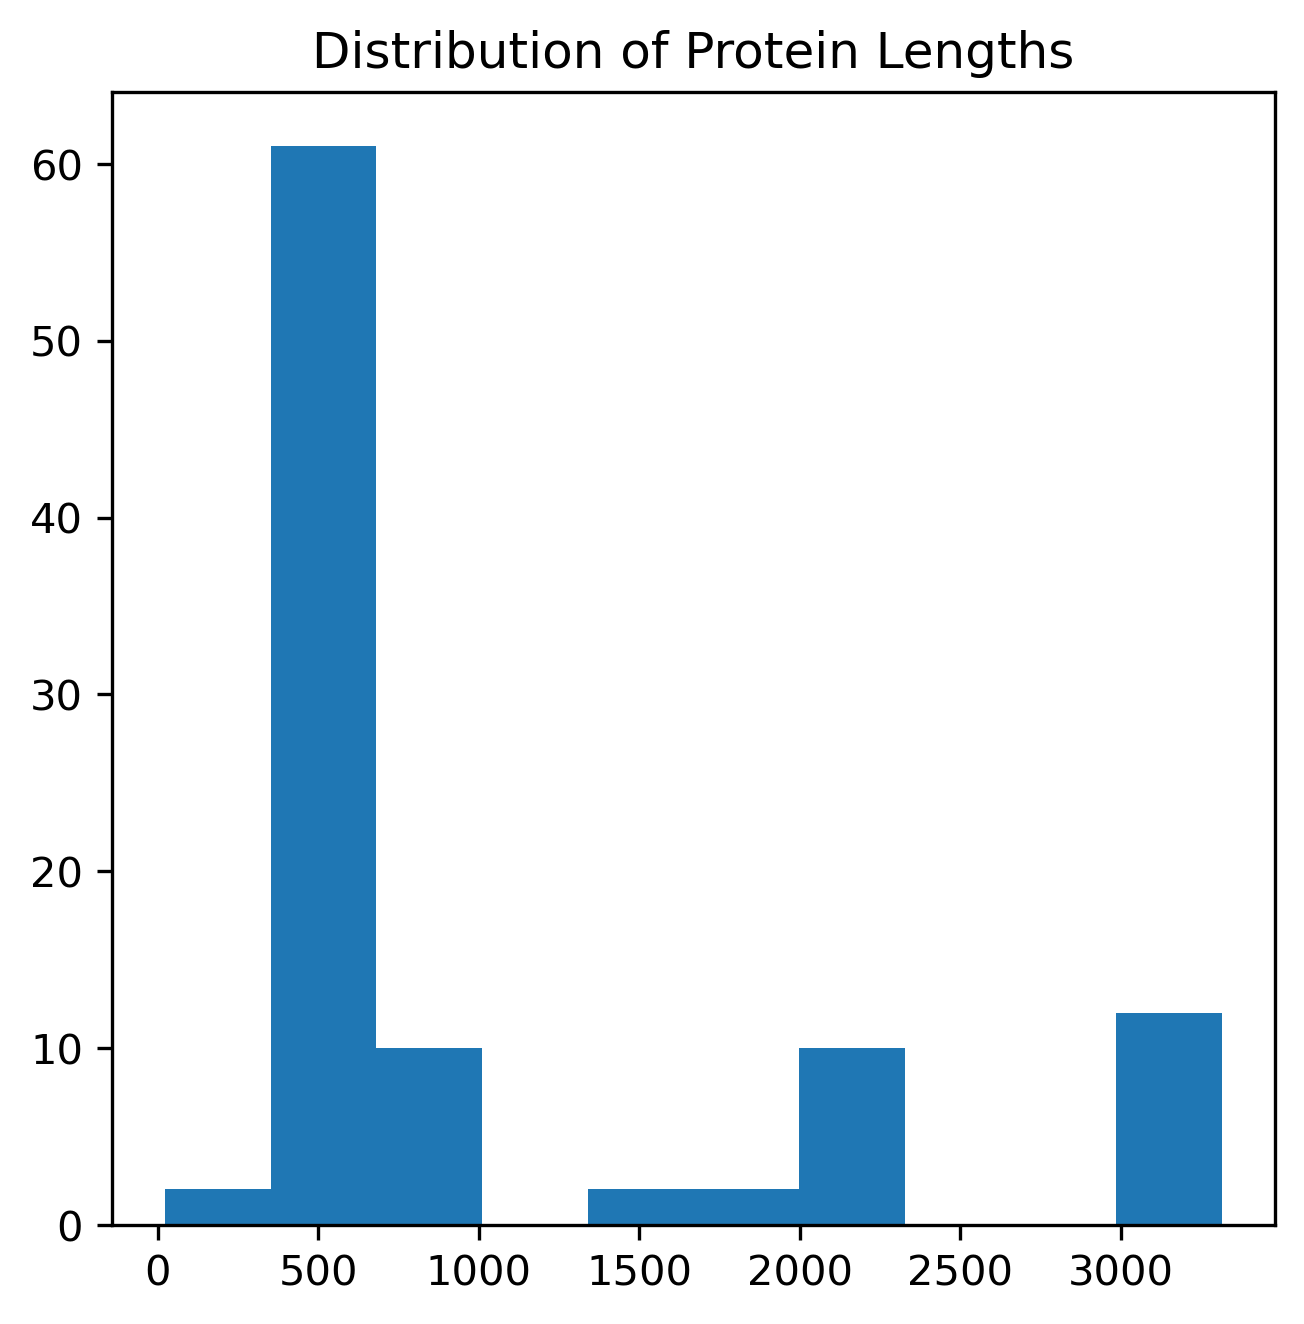

In [106]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

In [107]:
proteins[proteins["length"] < 150]

name family unit                    protein length
2N1C:A  2N1C:A   2N1C    A    FEDLPNFGHIQVKVFNHGEHIHH     23
2N30:A  2N30:A   2N30    A  XFEDLPNFGHIQVKVFNHGEHIHHX     25

### Initial Considerations

2N1C and 2N30 are both of very small proteins, which are probably the derivatives of other structures. Before removing them from consideration, however, it is probably best to review each.

#### 2N1C:A

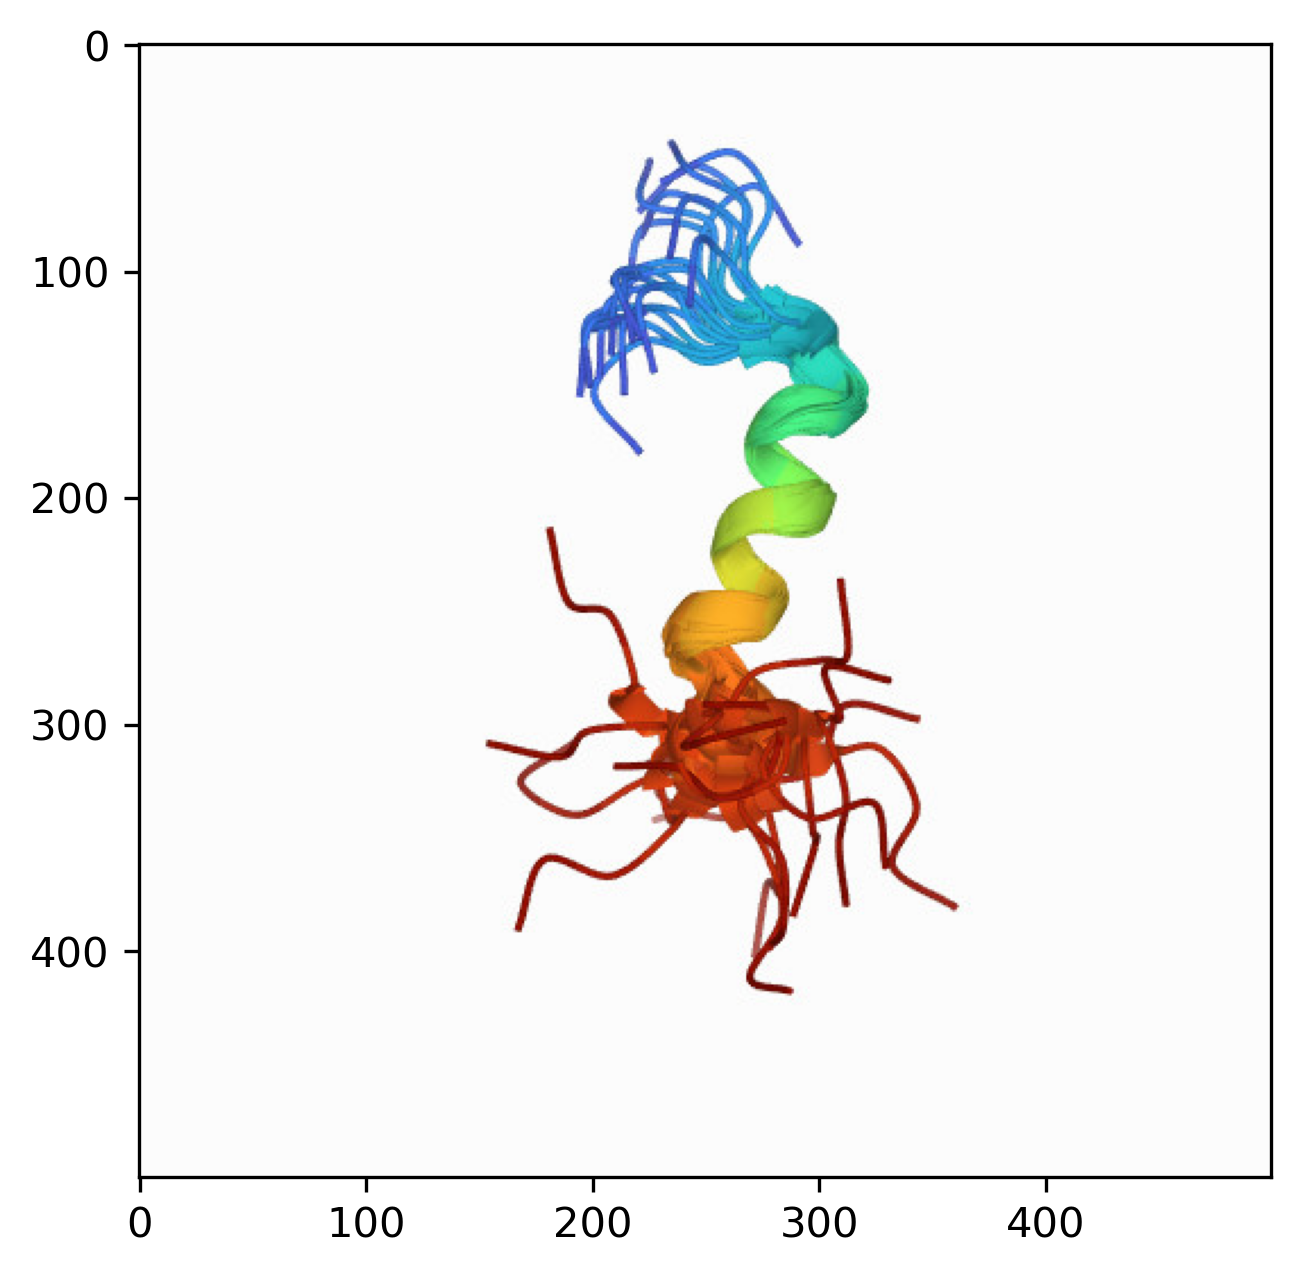

In [108]:
image = mpimg.imread("2n1c_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

#### 2N30:A

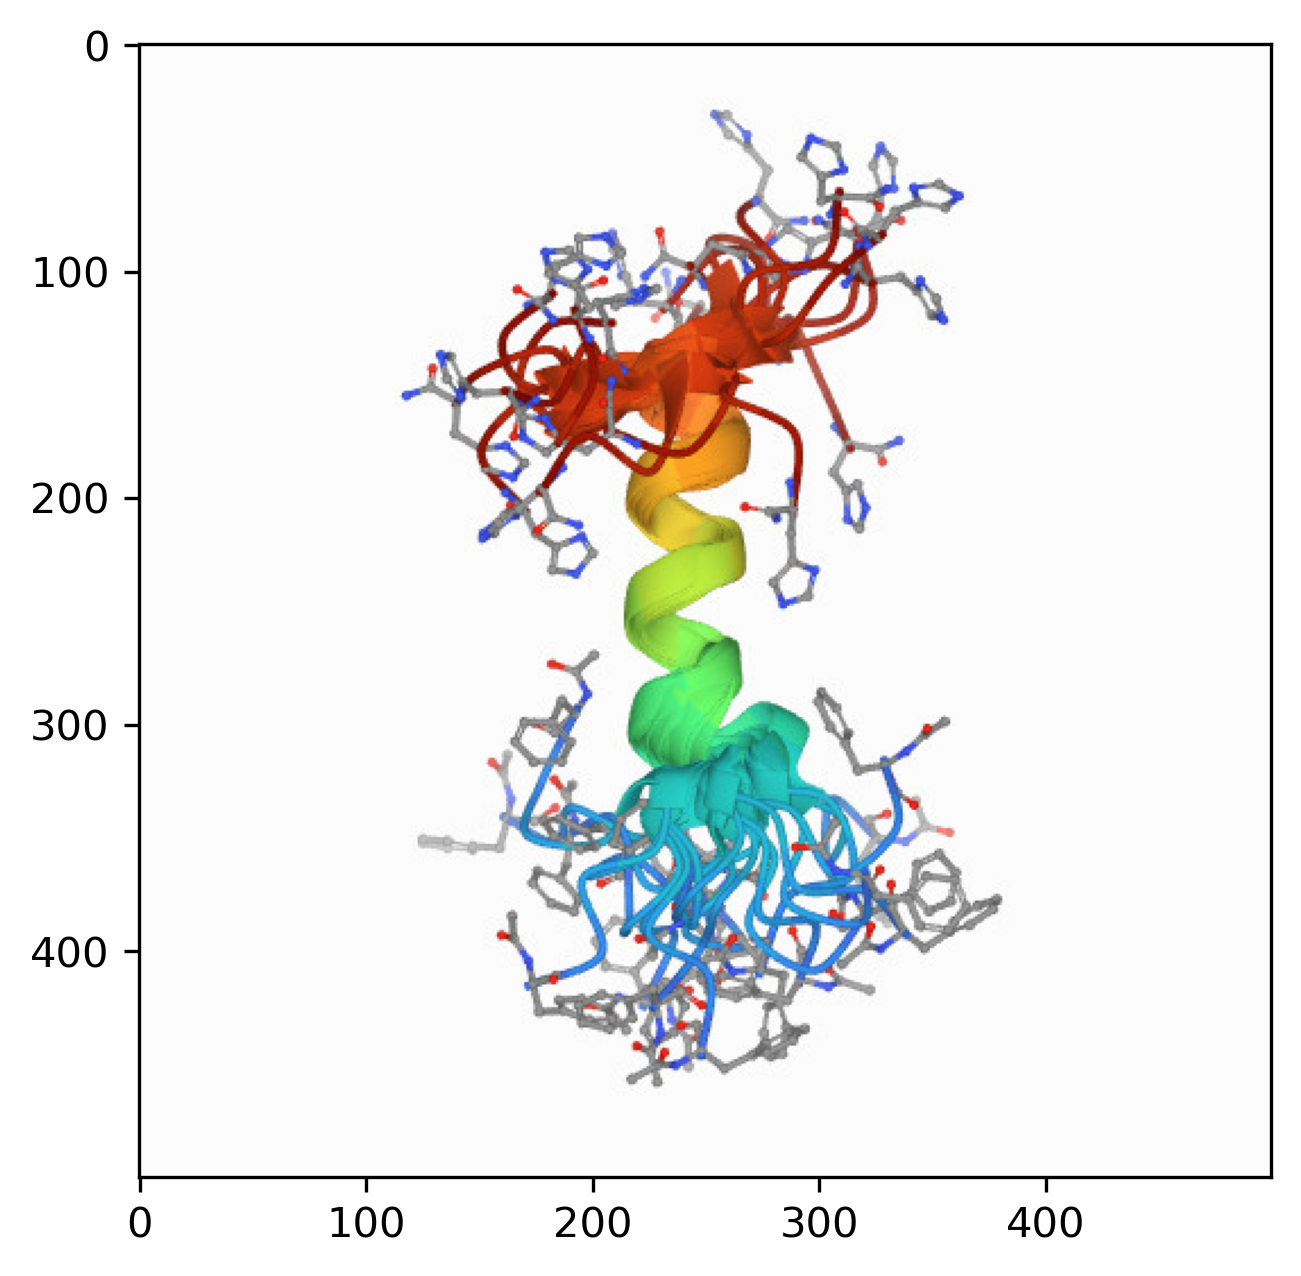

In [109]:
image = mpimg.imread("2n30_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

According to the literature, both of these proteins are derived from crustacean hemocyanins as an anitfungal agents [1]. Thus it seems reasonable to omit it from the analysis

[1] Petit, Vanessa W., et. al. "A Hemocyanin-derived Antimicrobial Peptide from the Penaeid Shrimp Adopts an Alpha-helical Structure That Specifically Permeabilizes Fungal Membranes." Biochimica Et Biophysica Acta (BBA) - General Subjects 1860.3 (2016): 557-68. Print.

#### Removal of 2N30 and 2N1C

In [110]:
proteins.drop(["2N1C:A", "2N30:A"], inplace = True)

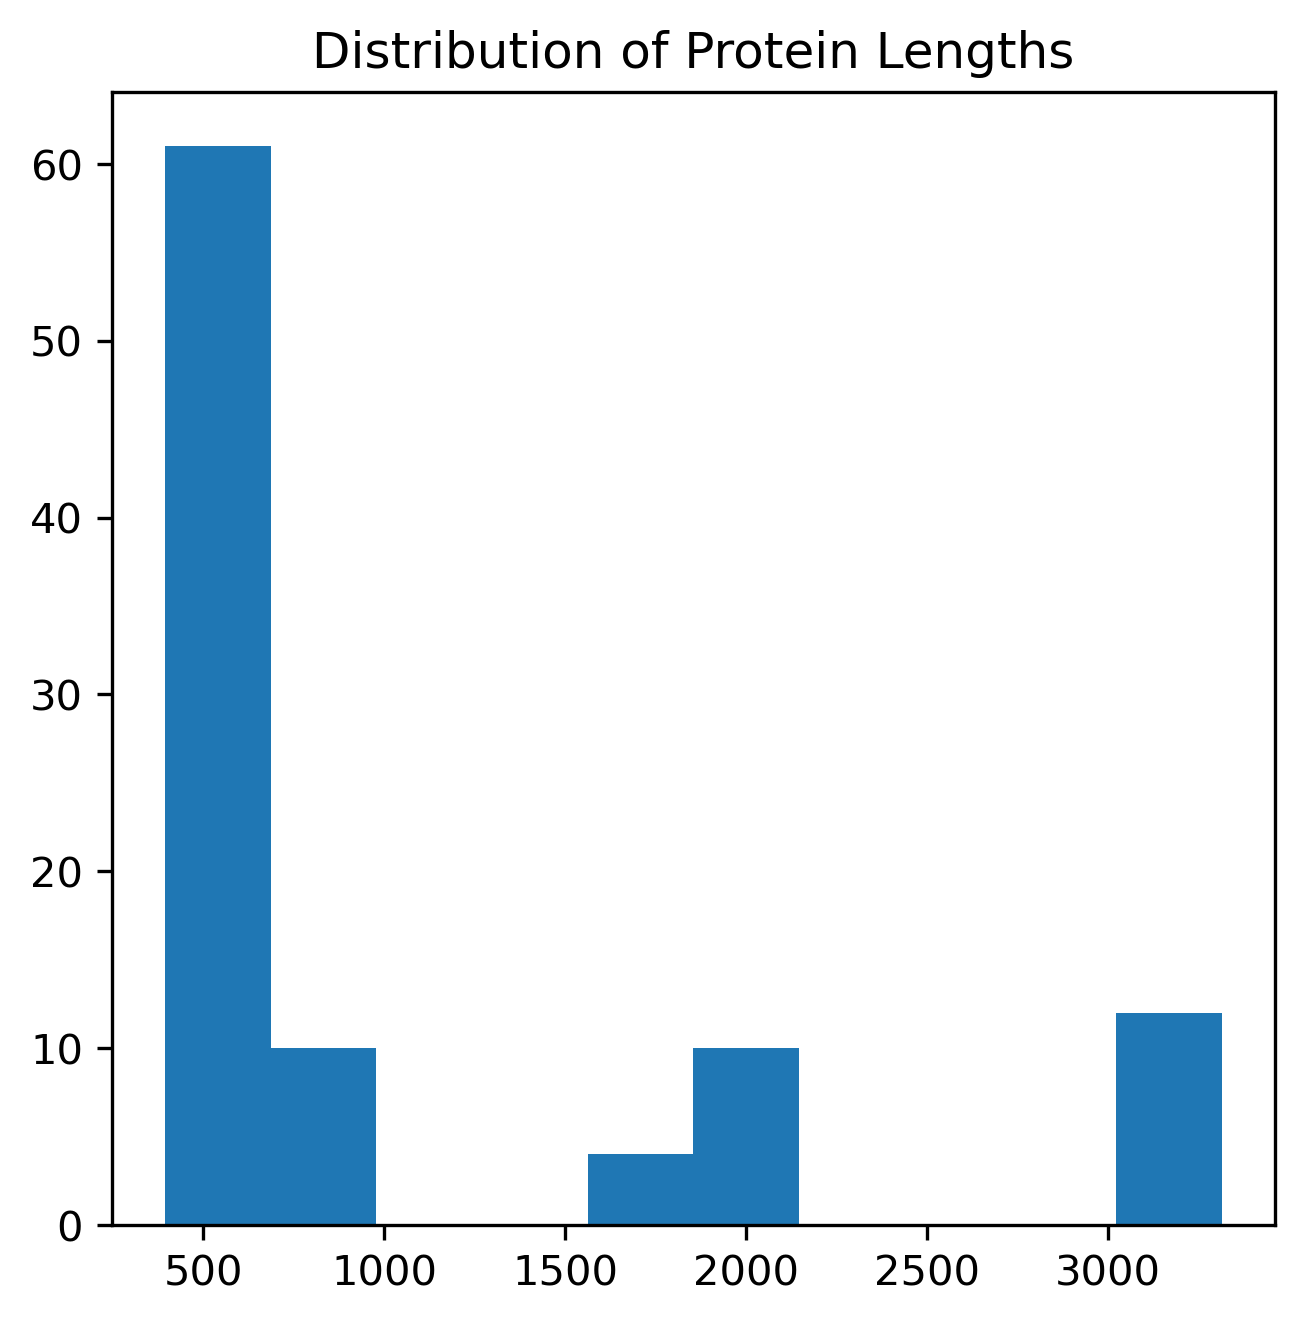

In [111]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

In [123]:
proteins.loc['1HCY:D']

name                                                  1HCY:D
family                                                  1HCY
unit                                                       D
protein    DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...
length                                                   657
Name: 1HCY:D, dtype: object

### Protein Frames

In [ ]:
# Make a dictionary for all blocks of letters in protein

protein_frames = {}
for protein, sequence in proteins.items():
    protein_frames[protein] = {}
    s_length = len(sequence)
    for i in range (1,15):
        for j in range(i, s_length - i):
            protein_frames[protein]["{}_{}".format(i,j - i)] = sequence[j - i:j]

We have to make an important decision about 2N1C and 2N30.Both of these proteins are very

### Align fasta files for Hemocyanin results

In [10]:
# These fasta files are all combined, but if they 
# Were separate, we could use fasta in glob("*.fasta"):

fasta = "rcsb_model.fasta"
with open("rcsb_model.fasta") as f:
    # Set output file name
    aligned_output = "{}-aligned.fasta".format(fasta)

    # Apply MAFFT alignement
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input= str(fasta))
    aligned, report = mafft_cline()
    
    # Uncomment to view MAFFT report
    # print(report)
    with open(aligned_output, "w") as handle:
        handle.write(aligned)

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 22 ambiguous characters.

    1 / 99
done.

Constructing a UPGMA tree (efffree=0) ... 

    0 / 99
   10 / 99
   20 / 99
   30 / 99
   40 / 99
   50 / 99
   60 / 99
   70 / 99
   80 / 99
   90 / 99
done.

Progressive alignment 1/2... 

STEP     1 / 98  f
STEP     2 / 98  f
STEP     3 / 98  f
STEP     4 / 98  f
STEP     5 / 98  f
STEP     6 / 98  f
STEP     7 / 98  f
STEP     8 / 98  f
STEP     9 / 98  f
STEP    10 / 98  f
STEP    11 / 98  f
STEP    12 / 98  f
STEP    13 / 98  f
STEP    14 / 98  f
STEP    15 / 98  f
STEP    16 / 98  f
STEP    17 / 98  f
STEP    18 / 98  f
STEP    19 / 98  f
STEP    20 / 98  f
STEP    21 / 98  f
STEP    22 / 98  f
STEP    23 / 98  f
STEP    24 / 98  f
STEP    25 / 98  f
STEP    26 / 98  f
STEP    27 / 98  f
STEP    28 / 98  f
STEP    29 